In [1]:
!pip install python-binance

In [1]:
import ssl
import time
import json
import urllib
import hmac, hashlib
import statistics
import requests
import asyncio
import pandas as pd
import concurrent.futures
from urllib.parse import urlparse, urlencode
from urllib.request import Request, urlopen
from datetime import timezone
from collections import Counter
import time
import numpy as np
from threading import Timer
from _thread import start_new_thread
from statistics import mean
import matplotlib.pyplot as plt
from datetime import datetime
from binance.client import Client

import warnings
warnings.filterwarnings('ignore')

In [2]:
class Binance():
    methods = {
            # public methods
            'ping':             {'url':'api/v1/ping', 'method': 'GET', 'private': False},
            'time':             {'url':'api/v1/time', 'method': 'GET', 'private': False},
            'exchangeInfo':     {'url':'api/v1/exchangeInfo', 'method': 'GET', 'private': False},
            'depth':            {'url': 'api/v1/depth', 'method': 'GET', 'private': False},
            'trades':           {'url': 'api/v1/trades', 'method': 'GET', 'private': False},
            'historicalTrades': {'url': 'api/v1/historicalTrades', 'method': 'GET', 'private': False},
            'aggTrades':        {'url': 'api/v1/aggTrades', 'method': 'GET', 'private': False},
            'klines':           {'url': 'api/v1/klines', 'method': 'GET', 'private': False},
            'ticker24hr':       {'url': 'api/v1/ticker/24hr', 'method': 'GET', 'private': False},
            'tickerPrice':      {'url': 'api/v3/ticker/price', 'method': 'GET', 'private': False},
            'tickerBookTicker': {'url': 'api/v3/ticker/bookTicker', 'method': 'GET', 'private': False},
            # private methods
            'createOrder':      {'url': 'api/v3/order', 'method': 'POST', 'private': True},
            'testOrder':        {'url': 'api/v3/order/test', 'method': 'POST', 'private': True},
            'orderInfo':        {'url': 'api/v3/order', 'method': 'GET', 'private': True},
            'cancelOrder':      {'url': 'api/v3/order', 'method': 'DELETE', 'private': True},
            'openOrders':       {'url': 'api/v3/openOrders', 'method': 'GET', 'private': True},
            'allOrders':        {'url': 'api/v3/allOrders', 'method': 'GET', 'private': True},
            'account':          {'url': 'api/v3/account', 'method': 'GET', 'private': True},
            'myTrades':         {'url': 'api/v3/myTrades', 'method': 'GET', 'private': True},
            # wapi
            'depositAddress':   {'url': 'wapi/v3/depositAddress.html', 'method':'GET', 'private':True},
            'withdraw':   {'url': 'wapi/v3/withdraw.html', 'method':'POST', 'private':True},
            'depositHistory': {'url': 'wapi/v3/depositHistory.html', 'method':'GET', 'private':True},
            'withdrawHistory': {'url': 'wapi/v3/withdrawHistory.html', 'method':'GET', 'private':True},
            'assetDetail': {'url': 'wapi/v3/assetDetail.html', 'method':'GET', 'private':True},
            'tradeFee': {'url': 'wapi/v3/tradeFee.html', 'method':'GET', 'private':True},
            'accountStatus': {'url': 'wapi/v3/accountStatus.html', 'method':'GET', 'private':True},
            'systemStatus': {'url': 'wapi/v3/systemStatus.html', 'method':'GET', 'private':True},
            'assetDust': {'url': 'sapi/v1/asset/dust', 'method':'POST', 'private':True},
            'dustLog': {'url': 'wapi/v3/userAssetDribbletLog.html', 'method':'GET', 'private':True},
            'assetAssetDividend': {'url': 'sapi/v1/asset/assetDividend', 'method':'GET', 'private':True},
            #sapi
            'marginTransfer': {'url': 'sapi/v1/margin/transfer', 'method': 'POST', 'private':True},
            'marginLoan': {'url': 'sapi/v1/margin/loan', 'method': 'POST', 'private': True},
            'marginLoanGet': {'url': 'sapi/v1/margin/loan', 'method': 'GET', 'private': True},
            'marginRepay': {'url': 'sapi/v1/margin/repay', 'method': 'POST', 'private': True},
            'marginRepayGet': {'url': 'sapi/v1/margin/repay', 'method': 'GET', 'private': True},
            'marginCreateOrder': {'url': 'sapi/v1/margin/order', 'method': 'POST', 'private':True},
            'marginCancelOrder': {'url': 'sapi/v1/margin/order', 'method': 'DELETE', 'private':True},
            'marginOrderInfo': {'url': 'sapi/v1/margin/order', 'method': 'GET', 'private':True},
            'marginAccount': {'url': 'sapi/v1/margin/account', 'method': 'POST', 'private':True},
            'marginOpenOrders': {'url': 'sapi/v1/margin/openOrders', 'method': 'GET', 'private':True},
            'marginAllOrders': {'url': 'sapi/v1/margin/allOrders', 'method': 'GET', 'private':True},
            'marginAsset': {'url': 'sapi/v1/margin/asset', 'method': 'POST', 'private':True},
            'marginPair': {'url': 'sapi/v1/margin/pair', 'method': 'POST', 'private':True},
            'marginPriceIndex': {'url': 'sapi/v1/margin/priceIndex', 'method': 'POST', 'private':True},
            'marginMyTrades': {'url': 'sapi/v1/margin/myTrades', 'method': 'GET', 'private':True},
            'marginMaxBorrowable': {'url': 'sapi/v1/margin/maxBorrowable', 'method': 'GET', 'private':True},
            'marginmaxTransferable': {'url': 'sapi/v1/margin/maxTransferable', 'method': 'GET', 'private':True},
            #futures
            'futuresExchangeInfo': {'url': 'fapi/v1/exchangeInfo', 'method': 'GET', 'private': False, 'futures': True},
            'futuresKlines': {'url': 'fapi/v1/klines', 'method': 'GET', 'private': False, 'futures': True},
            'futuresCreateOrder':      {'url': 'fapi/v1/order', 'method': 'POST', 'private': True, 'futures': True},
            'futuresAccount':      {'url': 'fapi/v1/account', 'method': 'POST', 'private': True, 'futures': True},
            'futuresBalance':      {'url': 'fapi/v1/balance', 'method': 'GET', 'private': True, 'futures': True},
            'futuresSymbolPriceTicker': {'url': 'fapi/v1/ticker/price', 'method': 'GET', 'private': True, 'futures': True},
            'futuresOrderInfo': {'url': 'fapi/v1/order', 'method': 'GET', 'private': True, 'futures': True},
            'futuresCancelOrder':      {'url': 'fapi/v1/order', 'method': 'DELETE', 'private': True, 'futures': True},
            'futuresPrice':      {'url': 'fapi/v1/ticker/price', 'method': 'GET', 'private': False, 'futures': True},
            'futuresDepth':      {'url': 'fapi/v1/depth', 'method': 'GET', 'private': False, 'futures': True},
            'futuresAllOrders':      {'url': 'fapi/v1/allOrders', 'method': 'GET', 'private': True, 'futures': True},
            'futuresOpenOrders':      {'url': 'fapi/v1/openOrders', 'method': 'GET', 'private': True, 'futures': True},
   }

    def __init__(self, API_KEY, API_SECRET):
        self.API_KEY = API_KEY
        self.API_SECRET = bytearray(API_SECRET, encoding='utf-8')
        self.shift_seconds = 0

    def __getattr__(self, name):
        def wrapper(*args, **kwargs):
            kwargs.update(command=name)
            return self.call_api(**kwargs)
        return wrapper

    def set_shift_seconds(self, seconds):
        self.shift_seconds = seconds

    def call_api(self, **kwargs):

        command = kwargs.pop('command')

        base_url ='https://api.binance.com/'
        if self.methods[command].get('futures'):
            base_url = 'https://fapi.binance.com/'
        api_url = base_url  + self.methods[command]['url']

        payload = kwargs
        headers = {}

        payload_str = urllib.parse.urlencode(payload)
        if self.methods[command]['private']:
            payload.update({'timestamp': int(time.time() + self.shift_seconds - 1) * 1000})
            payload_str = urllib.parse.urlencode(payload).encode('utf-8')
            sign = hmac.new(
                key=self.API_SECRET,
                msg=payload_str,
                digestmod=hashlib.sha256
            ).hexdigest()

            payload_str = payload_str.decode("utf-8") + "&signature="+str(sign)
            headers = {"X-MBX-APIKEY": self.API_KEY, "Content-Type":"application/x-www-form-urlencoded"}

        if self.methods[command]['method'] == 'GET' or self.methods[command]['url'].startswith('sapi'):
            api_url += '?' + payload_str

        response = requests.request(method=self.methods[command]['method'], url=api_url, data="" if self.methods[command]['method'] == 'GET' else payload_str, headers=headers)

        if 'code' in response.text:
            raise Exception(response.text)

        return response.json()

API_KEY = '' #
API_SECRET = '' #
bot = Binance(
    API_KEY=API_KEY,
    API_SECRET=API_SECRET
)
client=Client(API_KEY, 
              API_SECRET)

In [3]:
def client_create(api_list):
    clients = []
    for api_keys in api_list:
        clients.append(Binance(API_KEY = api_keys['apikey'],API_SECRET = api_keys['apisecret']))
    return clients

_API_LIST_ = [
]

In [9]:
coin_list=[]
pairs = bot.futuresExchangeInfo()
for s in pairs['symbols']:
    if 'USDT' in s['symbol'] and '0' not in s['symbol']:
        coin_list.append(s['symbol'])
print(coin_list)

['BTCUSDT', 'ETHUSDT', 'BCHUSDT', 'XRPUSDT', 'EOSUSDT', 'LTCUSDT', 'TRXUSDT', 'ETCUSDT', 'LINKUSDT', 'XLMUSDT', 'ADAUSDT', 'XMRUSDT', 'DASHUSDT', 'ZECUSDT', 'XTZUSDT', 'BNBUSDT', 'ATOMUSDT', 'ONTUSDT', 'IOTAUSDT', 'BATUSDT', 'VETUSDT', 'NEOUSDT', 'QTUMUSDT', 'IOSTUSDT', 'THETAUSDT', 'ALGOUSDT', 'ZILUSDT', 'KNCUSDT', 'ZRXUSDT', 'COMPUSDT', 'OMGUSDT', 'DOGEUSDT', 'SXPUSDT', 'KAVAUSDT', 'BANDUSDT', 'RLCUSDT', 'WAVESUSDT', 'MKRUSDT', 'SNXUSDT', 'DOTUSDT', 'DEFIUSDT', 'YFIUSDT', 'BALUSDT', 'CRVUSDT', 'TRBUSDT', 'RUNEUSDT', 'SUSHIUSDT', 'SRMUSDT', 'EGLDUSDT', 'SOLUSDT', 'ICXUSDT', 'STORJUSDT', 'BLZUSDT', 'UNIUSDT', 'AVAXUSDT', 'FTMUSDT', 'HNTUSDT', 'ENJUSDT', 'FLMUSDT', 'TOMOUSDT', 'RENUSDT', 'KSMUSDT', 'NEARUSDT', 'AAVEUSDT', 'FILUSDT', 'RSRUSDT', 'LRCUSDT', 'MATICUSDT', 'OCEANUSDT', 'CVCUSDT', 'BELUSDT', 'CTKUSDT', 'AXSUSDT', 'ALPHAUSDT', 'ZENUSDT', 'SKLUSDT', 'GRTUSDT', '1INCHUSDT', 'CHZUSDT', 'SANDUSDT', 'ANKRUSDT', 'BTSUSDT', 'LITUSDT', 'UNFIUSDT', 'REEFUSDT', 'RVNUSDT', 'SFPUSDT', 'XEM

In [14]:
new_coin_list=[]
try:
    for i in coin_list:
        vol = bot.ticker24hr(symbol=i)
        if float(vol['priceChangePercent'])>7 or float(vol['priceChangePercent'])<-7:
            new_coin_list.append(i)
except:
    pass
print(new_coin_list)

['ZRXUSDT', 'SNXUSDT']


In [4]:
_LIMIT_ = 1000
_SYMBOL_ = 'ZECUSDT'
_SECONDS_ = 60
_INTERVAL_ = f"{_SECONDS_//60}m"

In [5]:
def TimeNow():
  now = datetime.now()
  return now.strftime('%Y-%m-%d %H:%M:%S')

def time_stamp_to_normal(inputTime):
  return datetime.utcfromtimestamp(inputTime/1000).strftime('%Y-%m-%d %H:%M:%S')

def wait_time(delta_time):
  a = True
  while a:
    time.sleep(0.1)
    _timenow_ = str(TimeNow()).split(":")
    _timenow_ = _timenow_[len(_timenow_)-1]
    if int(_timenow_)%5 == 0:
      a = False

def TimeStampNow():
  return time.time()

def check(a, b):
  for i in a:
    if b == i:
      return True
  return False
def MinetsTimestamp(minets):
  return minets*60*1000
def TimestampToNormal(inputTime):
  return datetime.utcfromtimestamp(inputTime/1000).strftime('%Y-%m-%d %H:%M:%S')
def NormalToTimestamp(inputTime):
  return int(datetime.strptime(inputTime, '%Y-%m-%d %H:%M:%S').timestamp()*1000)
def klines_parsing(_klines_):
  _klines_final_ = []

  for _i_ in _klines_:
    _klines_final_.append({
    "Open time": TimestampToNormal(_i_[0]+60*60*3*1000),
    "Open": float(_i_[1]),
    "High": float(_i_[2]),
    "Low": float(_i_[3]),
    "Close": float(_i_[4]),
    "Volume": float(_i_[5]),
    "Close time": TimestampToNormal(_i_[6]+60*60*3*1000),
    "Quote asset volume": _i_[7],
    "Number of trades": _i_[8],
    "Taker buy base asset volume": _i_[9],
    "Taker buy quote asset volume": _i_[10],
    "Ignore": _i_[11]
    })
  return _klines_final_

TimestampNow = NormalToTimestamp(TimeNow())
close = []
close_max = []
close_min = []
for i in range(1, 37):
  _MINETS_ = 240
  _INTERVAL_ = "5m"

  _klines_ = bot.klines(
                symbol=_SYMBOL_,
                limit=_MINETS_,
                interval=_INTERVAL_,
                startTime=TimestampNow - MinetsTimestamp(_MINETS_*i),
                endTime=TimestampNow - MinetsTimestamp(_MINETS_*(i-1)),
  )
  _klines_ = klines_parsing(_klines_)
  _klines_ = pd.DataFrame(_klines_)
  for i in _klines_['Close']:
    close.append(i)
  close_max.append(max(close))
  close_min.append(min(close))
  close.clear()

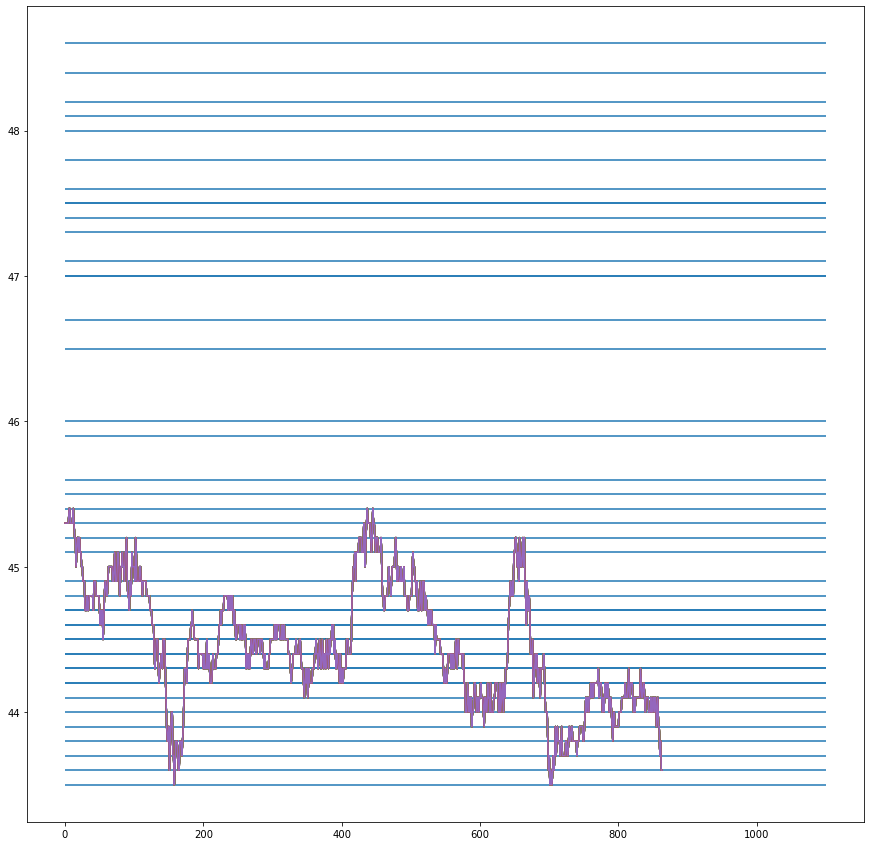

In [7]:
_klines_all_ = bot.klines(
                symbol=_SYMBOL_,
                limit=1440*3,
                interval=_INTERVAL_,
                startTime=TimestampNow - MinetsTimestamp(1440*3),
                endTime=TimestampNow,
  )
_klines_all_ = klines_parsing(_klines_all_)
_klines_all_ = pd.DataFrame(_klines_all_)
plt.figure(figsize=(15, 15))
for i in set(close_max):
  x = _klines_all_['Close']
  plt.hlines(y=i, xmin=0, xmax=1100)
  plt.plot(x)
for i in set(close_min):
  x = _klines_all_['Close']
  plt.hlines(y=i, xmin=0, xmax=1100)
  plt.plot(x)
plt.show()


In [11]:
close_max_min = close_max+close_min
counter_max_min = Counter(close_max_min)
close_max_min_copy=close_max_min.copy()
print(counter_max_min)
print(close_max_min)

Counter({44.7: 7, 44.1: 6, 44.4: 5, 44.5: 5, 43.6: 5, 44.3: 5, 45.2: 4, 44.2: 4, 43.8: 3, 44.8: 3, 44.6: 3, 45.4: 3, 43.5: 3, 43.9: 2, 45.1: 2, 42.9: 2, 44.0: 2, 44.9: 1, 45.0: 1, 45.6: 1, 47.1: 1, 48.1: 1, 43.3: 1, 43.4: 1, 46.7: 1})
[43.8, 43.9, 44.4, 44.1, 44.8, 44.7, 44.7, 44.5, 43.6, 44.4, 44.6, 44.4, 44.1, 44.3, 44.3, 44.1, 45.2, 45.2, 44.5, 44.9, 45.2, 45.4, 45.0, 44.5, 44.6, 44.8, 44.7, 44.5, 45.2, 45.1, 45.4, 45.1, 45.4, 45.6, 47.1, 48.1, 43.3, 43.4, 43.6, 43.5, 44.2, 44.1, 44.3, 43.6, 42.9, 42.9, 44.1, 43.8, 43.6, 44.0, 43.8, 43.6, 43.5, 44.0, 43.9, 44.2, 44.7, 44.7, 44.2, 44.1, 44.3, 44.3, 44.2, 43.5, 44.4, 44.5, 44.7, 44.7, 44.8, 44.4, 44.6, 46.7]


In [7]:
df=pd.DataFrame([], columns=['Монета', 'Тип операции', 'bids or asks', 'Цена входа', 'Время входа', 'Цена выхода', 'Время выхода', 'Правильный Неправильный'])
df

,Монета,Тип операции,bids or asks,Цена входа,Время входа,Цена выхода,Время выхода,Правильный Неправильный


In [8]:
def profit_calculate(reduced, deductible, profit, lots, commission):
    profit=(float(reduced)*lots-float(deductible)*lots+float(profit))-(float(reduced)*commission*lots+float(deductible)*commission*lots)
    return profit
 
def start_sum_calculate(reduced, deductible, start_sum, lots, commission):
    start_sum=(float(reduced)*lots-float(deductible)*lots)-(float(reduced)*commission*lots+float(deductible)*commission*lots)+start_sum
    return start_sum

def find(value, seq):
    for index, item in enumerate(seq):
        if value in item: 
            return index, item
 
def main_algorithm_1(breakdown_rebound, type_operation, profit, lots, commission, right_answer, false_answer, start_sum, origClientOrderId):#Пробой asks и отcкок bids
    last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots, 2), price=1-stop_loss, side='SELL')
    bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots, 2), price=1+take_profit, side='SELL')
    start=last_price['lastPrice']
    time_start=TimeNow()
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start)
    while True:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        if float(last_price['lastPrice'])<float(start)*(1-stop_loss):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по стопу', f'sell {type_operation}', end)
            false_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, False]
            break
        if float(last_price['lastPrice'])>float(start)*(1+take_profit):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, True]
            break
    profit = profit_calculate(end, start, profit, lots, commission)
    start_sum = start_sum_calculate(end, start, start_sum, lots, commission)
    return profit, start_sum, right_answer, false_answer
    
def main_algorithm_2(breakdown_rebound, type_operation, profit, lots, commission, right_answer, false_answer, start_sum, origClientOrderId): #Пробой bids и отcкок asks
    last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots, 2), price=1+stop_loss, side='BUY')
    bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots, 2), price=1-take_profit, side='BUY')
    start=last_price['lastPrice']
    time_start=TimeNow()
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start)
    while True:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        if float(last_price['lastPrice'])<float(start)*(1-take_profit):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, True]
            break
        if float(last_price['lastPrice'])>float(start)*(1+stop_loss):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по стопу', f'sell {type_operation}', end)
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, False]
            false_answer+=1
            break
    
    profit = profit_calculate(start, end, profit, lots, commission)
    start_sum = start_sum_calculate(start, end, start_sum, lots, commission)
    return profit, start_sum, right_answer, false_answer

def main_algorithm_3(breakdown_rebound, type_operation, profit, lots, commission, right_answer, false_answer, start_sum, origClientOrderId ):#Пробой asks и отcкок bids
    last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots, 2), price=1-stop_loss, side='SELL')
    bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots, 2), price=1+take_profit, side='SELL')
    start=last_price['lastPrice']
    time_start=TimeNow()
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start)
    while True:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        if float(last_price['lastPrice'])<float(start)*(1-stop_loss):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по стопу', f'sell {type_operation}', end)
            false_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, False]
            break
        if float(last_price['lastPrice'])>float(start)*(1+take_profit):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, True]
            break
    profit = profit_calculate(end, start, profit, lots, commission)
    start_sum = start_sum_calculate(end, start, start_sum, lots, commission)
    return profit, start_sum, right_answer, false_answer


def main_algorithm_4(breakdown_rebound, type_operation, profit, lots, commission, right_answer, false_answer, start_sum, origClientOrderId ): #Пробой bids и отcкок asks
    last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots, 2), price=round(nearest_asks*(1+stop_loss), 6), side='BUY')
    bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots, 2), price=round(nearest_asks*(1-take_profit),6), side='BUY')
    start=last_price['lastPrice']
    time_start=TimeNow()
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start)
    while True:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        if float(last_price['lastPrice'])<float(start)*(1-take_profit):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, True]
            break
        if float(last_price['lastPrice'])>float(start)*(1+stop_loss):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по стопу', f'sell {type_operation}', end)
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, False]
            false_answer+=1
            break
    
    profit = profit_calculate(start, end, profit, lots, commission)
    start_sum = start_sum_calculate(start, end, start_sum, lots, commission)
    return profit, start_sum, right_answer, false_answer

In [12]:
i=0
profit=0
start_sum=float(bot.futuresBalance()[6]['balance'])
# start_sum=float(start_sum)/4*0,997
#lots=10
how_more_mean_vol=0.3
stop_loss=0.001
take_profit=0.002
right_answer=0
false_answer=0
bot_number=0
commission=0.000162
close_max_copy=close_max.copy()
close_min_copy=close_min.copy()
BOT_LIST = client_create(_API_LIST_)

while True:
#     try:
        i+=1
        if bot_number == 12:
            bot_number = 0
        bot_number+=1
        bids=[]
        asks=[]
        glass = BOT_LIST[bot_number].depth(symbol=_SYMBOL_)
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        bids_list_vol=[]

        for j in glass['bids']:
            bids_list_vol.append(j[1])
        bids_list_vol = np.array(bids_list_vol).astype(np.float)
        a = np.mean(bids_list_vol)*how_more_mean_vol
        for u in glass['bids']:
            if float(u[1])>a:
                bids.append(u[0])
        for f in glass['asks']:
            if float(f[1])>a:
                asks.append(f[0])

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        last = last_price['lastPrice']
        bids = np.array(bids).astype(np.float)
        asks = np.array(asks).astype(np.float)
        nearest_bids = min(set(bids), key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_asks = min(set(asks), key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_close_max = min(close_max_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_close_min = min(close_min_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        
        if last_price['lastPrice']==float(glass['bids'][find(format(nearest_bids, '.8f'), glass['bids'])[0]-1][0]):
            bot.futuresCreateOrder(symbol=_SYMBOL_, side='BUY', type='LIMIT', timeInForce='GTC', quantity=round(lots, 2), price=nearest_bids, newClientOrderId="buy_bids")
        if last_price['lastPrice']==float(glass['bids'][find(format(nearest_close_max, '.8f'), glass['asks'])[0]+1][0]) and nearest_close_max in list(bids) and counter_max_min[nearest_close_max]>=2:
            bot.futuresCreateOrder(symbol=_SYMBOL_, side='BUY', type='LIMIT', timeInForce='GTC', quantity=round(lots, 2), price=nearest_close_max, newClientOrderId='buy_asks')
#         if last_price['lastPrice']==float(glass['bids'][find(format(nearest_close_min, '.8f'), glass['bids'])[0]-1][0]) and nearest_close_min in list(asks) and counter_max_min[nearest_close_min]>=2:
#             bot.futuresCreateOrder(symbol=_SYMBOL_, side='SELL', type='LIMIT', timeInForce='GTC', quantity=round(lots, 2), price=nearest_close_min, newClientOrderId="sell_bids")
        if last_price['lastPrice']==float(glass['bids'][find(format(nearest_asks, '.8f'), glass['asks'])[0]+1][0]):
            bot.futuresCreateOrder(symbol=_SYMBOL_, side='SELL', type='LIMIT', timeInForce='GTC', quantity=round(lots, 2), price=nearest_asks, newClientOrderId="sell_asks")
        
        
        if float(last_price['lastPrice']) == nearest_close_max:
#             bot.futuresCancelOrder(orderId="buy_bids", symbol=_SYMBOL_)
#             bot.futuresCancelOrder(orderId="sell_bids", symbol=_SYMBOL_)
#             bot.futuresCancelOrder(orderId="sell_asks", symbol=_SYMBOL_)
            profit, start_sum, right_answer, false_answer=main_algorithm_1('пробой', 'asks', profit, round(lots, 2), commission, right_answer, false_answer, origClientOrderId='buy_asks')

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
#         if float(last_price['lastPrice']) == nearest_close_min:
#             bot.futuresCancelOrder(orderId="buy_bids", symbol=_SYMBOL_)
#             bot.futuresCancelOrder(orderId="buy_asks", symbol=_SYMBOL_)
#             bot.futuresCancelOrder(orderId="sell_asks", symbol=_SYMBOL_)  
#             profit, start_sum, right_answer, false_answer=main_algorithm_2('пробой', 'bids', profit, round(lots, 2), commission, right_answer, false_answer, start_sum, 'sell_bids')

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        if float(last_price['lastPrice']) == nearest_bids:
#             bot.futuresCancelOrder(orderId="sell_bids", symbol=_SYMBOL_)
#             bot.futuresCancelOrder(orderId="buy_asks", symbol=_SYMBOL_)
#             bot.futuresCancelOrder(orderId="sell_asks", symbol=_SYMBOL_)  
            profit, start_sum, right_answer, false_answer=main_algorithm_3('отскок', 'bids', profit, round(lots, 2), commission, right_answer, false_answer, start_sum, 'buy_bids')
            set(bids).remove(nearest_bids)            

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        if float(last_price['lastPrice']) == nearest_asks:
#             bot.futuresCancelOrder(orderId="sell_bids", symbol=_SYMBOL_)
#             bot.futuresCancelOrder(orderId="buy_asks", symbol=_SYMBOL_)
#             bot.futuresCancelOrder(orderId="buy_bids", symbol=_SYMBOL_) 
            profit, start_sum, right_answer, false_answer=main_algorithm_4('отскок', 'asks', profit, round(lots, 2), commission, right_answer, false_answer, start_sum, 'sell_asks')
            set(asks).remove(nearest_asks)
        if i%15==0:
            list(bids).clear()
            list(asks).clear()
        print('Заработали:', profit)
        print('Правильных ответов:', right_answer, 'Неправильных ответов:', false_answer)
        print('Конечеая сумма:', start_sum, 'Кол-во торгуемых лотов:', lots)
        
#         bot.futuresCancelOrder(orderId="buy_bids", symbol=_SYMBOL_)
#         bot.futuresCancelOrder(orderId="sell_bids", symbol=_SYMBOL_)
#         bot.futuresCancelOrder(orderId="sell_asks", symbol=_SYMBOL_)
#         bot.futuresCancelOrder(orderId="buy_asks", symbol=_SYMBOL_)         
        
#     except Exception as err:
#         print('Ошибка:', err)

Exception: {"code":-1111,"msg":"Precision is over the maximum defined for this asset."}

In [ ]:
df

In [ ]:
df.to_csv (r'scalping_bot_version_for_Binance.csv', index= False)

In [37]:
# bot.futuresCreateOrder(symbol=_SYMBOL_, side='SELL', type='MARKET', quantity=0.37, newClientOrderId='buy_asks')
bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=0.37, price=44, side='BUY', stopPrice=44.1)
# bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=0.37, price=39, side='BUY')

{'orderId': 14434841109,
 'symbol': 'ZECUSDT',
 'status': 'NEW',
 'clientOrderId': 'SLnDKp0d9cipYNVhHm9YCO',
 'price': '44',
 'avgPrice': '0.00000',
 'origQty': '0.370',
 'executedQty': '0',
 'cumQty': '0',
 'cumQuote': '0',
 'timeInForce': 'GTC',
 'type': 'STOP',
 'reduceOnly': False,
 'closePosition': False,
 'side': 'BUY',
 'positionSide': 'BOTH',
 'stopPrice': '44.10',
 'workingType': 'CONTRACT_PRICE',
 'priceProtect': False,
 'origType': 'STOP',
 'updateTime': 1676403376222}

In [7]:
def profit_calculate(reduced, deductible, profit, lots, commission):
    profit=(float(reduced)*lots-float(deductible)*lots+float(profit))-(float(reduced)*commission*lots+float(deductible)*commission*lots)
    return profit
 
def start_sum_calculate(reduced, deductible, start_sum, lots, commission):
    start_sum=(float(reduced)*lots-float(deductible)*lots)-(float(reduced)*commission*lots+float(deductible)*commission*lots)+start_sum
    return start_sum

def find(value, seq):
    for index, item in enumerate(seq):
        if value in item: 
            return index, item
 
def main_algorithm_1(breakdown_rebound, type_operation, profit, lots, commission, right_answer, false_answer, start_sum, origClientOrderId, nearest_close_max):#Пробой asks и отcкок bids
    last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots, 2), price=nearest_close_max, stopPrice=nearest_close_max*(1-stop_loss), side='SELL')
    bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots, 2), price=nearest_close_max, stopPrice=nearest_close_max*(1+take_profit), side='SELL')
    start=last_price['lastPrice']
    time_start=TimeNow()
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start)
    while True:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        if float(last_price['lastPrice'])<float(start)*(1-stop_loss):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по стопу', f'sell {type_operation}', end)
            false_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, False]
            break
        if float(last_price['lastPrice'])>float(start)*(1+take_profit):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, True]
            break
    profit = profit_calculate(end, start, profit, lots, commission)
    start_sum = start_sum_calculate(end, start, start_sum, lots, commission)
    return profit, start_sum, right_answer, false_answer
    
def main_algorithm_2(breakdown_rebound, type_operation, profit, lots, commission, right_answer, false_answer, start_sum, origClientOrderId, nearest_close_min): #Пробой bids и отcкок asks
    last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots, 2), stopPrice=nearest_close_min*(1+stop_loss), side='BUY', price=nearest_close_min)
    bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots, 2), stopPrice=nearest_close_min*(1-take_profit), side='BUY', price=nearest_close_min)
    start=last_price['lastPrice']
    time_start=TimeNow()
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start)
    while True:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        if float(last_price['lastPrice'])<float(start)*(1-take_profit):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, True]
            break
        if float(last_price['lastPrice'])>float(start)*(1+stop_loss):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по стопу', f'sell {type_operation}', end)
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, False]
            false_answer+=1
            break
    
    profit = profit_calculate(start, end, profit, lots, commission)
    start_sum = start_sum_calculate(start, end, start_sum, lots, commission)
    return profit, start_sum, right_answer, false_answer

def main_algorithm_3(breakdown_rebound, type_operation, profit, lots, commission, right_answer, false_answer, start_sum, origClientOrderId, nearest_bids):#Пробой asks и отcкок bids
    last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots, 2), stopPrice=nearest_bids*(1-stop_loss), side='SELL', price=nearest_bids)
    bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots, 2), stopPrice=nearest_bids*(1+take_profit), side='SELL', price=nearest_bids)
    start=last_price['lastPrice']
    time_start=TimeNow()
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start)
    while True:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        if float(last_price['lastPrice'])<float(start)*(1-stop_loss):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по стопу', f'sell {type_operation}', end)
            false_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, False]
            break
        if float(last_price['lastPrice'])>float(start)*(1+take_profit):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, True]
            break
    profit = profit_calculate(end, start, profit, lots, commission)
    start_sum = start_sum_calculate(end, start, start_sum, lots, commission)
    return profit, start_sum, right_answer, false_answer


def main_algorithm_4(breakdown_rebound, type_operation, profit, lots, commission, right_answer, false_answer, start_sum, origClientOrderId, nearest_asks): #Пробой bids и отcкок asks
    last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
    bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots, 2), stopPrice=nearest_asks*(1+stop_loss), side='BUY', price=nearest_asks)
    bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots, 2), stopPrice=nearest_asks*(1-take_profit), side='BUY', price=nearest_asks)
    start=last_price['lastPrice']
    time_start=TimeNow()
    print(f'Работаем на {breakdown_rebound}', f'buy {type_operation}', start)
    while True:
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        if float(last_price['lastPrice'])<float(start)*(1-take_profit):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по тейку', f'sell {type_operation}', end)
            right_answer+=1
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, True]
            break
        if float(last_price['lastPrice'])>float(start)*(1+stop_loss):
            end=last_price['lastPrice']
            end_time=TimeNow()
            print('Закрылись по стопу', f'sell {type_operation}', end)
            df.loc[ len(df.index )] = [_SYMBOL_, breakdown_rebound, type_operation, start, time_start, end, end_time, False]
            false_answer+=1
            break
    
    profit = profit_calculate(start, end, profit, lots, commission)
    start_sum = start_sum_calculate(start, end, start_sum, lots, commission)
    return profit, start_sum, right_answer, false_answer

In [9]:
float(bot.futuresBalance()[6]['balance'])

19.05664835

In [11]:
def find(value, seq):
    for index, item in enumerate(seq):
        if value in item: 
            return index, item

i=0
profit=0
start_sum=float(bot.futuresBalance()[6]['balance'])
# start_sum=float(start_sum)/4*0,997
#lots=10
how_more_mean_vol=0.3
stop_loss=0.001
take_profit=0.002
right_answer=0
false_answer=0
bot_number=0
commission=0.000162
close_max_copy=close_max.copy()
close_min_copy=close_min.copy()
BOT_LIST = client_create(_API_LIST_)

while True:
    try:
        i+=1
        if bot_number == 12:
            bot_number = 0
        bot_number+=1
        bids=[]
        asks=[]
        glass = BOT_LIST[bot_number].depth(symbol=_SYMBOL_)
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        bids_list_vol=[]

        for j in glass['bids']:
            bids_list_vol.append(j[1])
        bids_list_vol = np.array(bids_list_vol).astype(np.float)
        a = np.mean(bids_list_vol)*how_more_mean_vol
        for u in glass['bids']:
            if float(u[1])>a and float(u[1]) not in close_min_copy:
                bids.append(u[0])
        for f in glass['asks']:
            if float(f[1])>a and float(f[1]) not in close_max_copy:
                asks.append(f[0])

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        last = last_price['lastPrice']
        bids = np.array(bids).astype(np.float)
        asks = np.array(asks).astype(np.float)
        nearest_bids = min(set(bids), key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_asks = min(set(asks), key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_close_max = min(close_max_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_close_min = min(close_min_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        near_nearest_bids=nearest_bids+abs(float(glass['bids'][0][0])-float(glass['bids'][1][0]))/11
        near_nearest_asks=nearest_asks-abs(float(glass['asks'][0][0])-float(glass['asks'][1][0]))/11
        near_nearest_close_max=nearest_close_max-abs(float(glass['asks'][0][0])-float(glass['asks'][1][0]))/11
        near_nearest_close_min=nearest_close_min+abs(float(glass['bids'][0][0])-float(glass['bids'][1][0]))/11
        
        print('bids', float(last_price['lastPrice'])-nearest_bids)
        if float(client.futures_account()['positions'][68]['positionInitialMargin'])==0:
            try:
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='take_profit')
            except Exception:
                pass
            try:
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='stop_loss')
            except Exception:
                pass
            
        if float(client.futures_account()['positions'][68]['positionInitialMargin'])==0 and float(client.futures_account()['positions'][68]['openOrderInitialMargin'])==0:
            try:
                bot.futuresCreateOrder(symbol=_SYMBOL_, side='SELL', type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=round(near_nearest_asks, 2), price=nearest_asks, newClientOrderId="sell_asks")
            except Exception:
                pass
            try:
                bot.futuresCreateOrder(symbol=_SYMBOL_, side='BUY', type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=round(near_nearest_bids, 2), price=nearest_bids, newClientOrderId="buy_bids")            
            except Exception:
                pass
        if float(client.futures_account()['positions'][68]['positionInitialMargin'])==0 and float(client.futures_account()['positions'][68]['openOrderInitialMargin'])==0:
            try:
                    if nearest_close_max in list(bids) and counter_max_min[nearest_close_max]>=2:
                        bot.futuresCreateOrder(symbol=_SYMBOL_, side='BUY', type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=round(near_nearest_close_max, 2), price=nearest_close_max, newClientOrderId='buy_asks')
                    if nearest_close_min in list(asks) and counter_max_min[nearest_close_min]>=2:
                        bot.futuresCreateOrder(symbol=_SYMBOL_, side='SELL', type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=round(near_nearest_close_min, 2), price=nearest_close_min, newClientOrderId="sell_bids")            
            except Exception:
                pass
        try:
            if float(bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='sell_asks')['price']) != nearest_asks:
                print('nearest_asks', nearest_asks, 'stopPrice', float(bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='sell_asks')['price']))
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_asks')
                bot.futuresCreateOrder(symbol=_SYMBOL_, side='SELL', type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=round(near_nearest_asks, 2), price=nearest_asks, newClientOrderId="sell_asks")
            if float(bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='buy_bids')['price']) != nearest_bids:
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_bids')
                bot.futuresCreateOrder(symbol=_SYMBOL_, side='BUY', type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=round(near_nearest_bids, 2), price=nearest_bids, newClientOrderId="buy_bids")
            if float(bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='buy_asks')['price']) != nearest_close_max:
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_asks')
                if nearest_close_max in list(bids) and counter_max_min[nearest_close_max]>=2:
                    bot.futuresCreateOrder(symbol=_SYMBOL_, side='BUY', type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=round(near_nearest_close_max, 2), price=nearest_close_max, newClientOrderId='buy_asks')
            if float(bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='sell_bids')['price']) != nearest_close_min:
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_bids')
                if nearest_close_min in list(asks) and counter_max_min[nearest_close_min]>=2:
                    bot.futuresCreateOrder(symbol=_SYMBOL_, side='SELL', type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=round(near_nearest_close_min, 2), price=nearest_close_min, newClientOrderId="sell_bids")            
        except Exception:
            pass
        print('asks', nearest_asks-float(last_price['lastPrice']))
        
        if bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='sell_asks')['status'] == 'FILLED' and float(client.futures_account()['positions'][68]['positionInitialMargin'])>=0:
            try:
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_bids')
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_asks')                
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_bids')
            except Exception:
                pass
            try:
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), price=round(nearest_asks*(1+stop_loss), 2), side='BUY', stopPrice=nearest_asks, newClientOrderId="stop_loss")
            except Exception:
                pass
            try:
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), price=round(nearest_asks*(1-take_profit), 2), side='BUY', stopPrice=nearest_asks, newClientOrderId="take_profit")            
            except Exception:
                pass
            set(asks).remove(nearest_asks)
            
        if bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='buy_bids')['status'] == 'FILLED' and float(client.futures_account()['positions'][68]['positionInitialMargin'])>=0:
            try:
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_asks')
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_bids')
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_asks')                
            except Exception:
                pass
            try:
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), price=round(nearest_bids*(1-stop_loss), 2), side='SELL', stopPrice=nearest_bids, newClientOrderId="stop_loss")
            except Exception:
                pass
            try:
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), price=round(nearest_bids*(1+take_profit), 2), side='SELL', stopPrice=nearest_bids, newClientOrderId="take_profit")            
            except Exception:
                pass
            set(bids).remove(nearest_bids)
            
        try:
            if bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='buy_asks')['status'] == 'FILLED' and float(client.futures_account()['positions'][68]['positionInitialMargin'])>=0:
                try:
                    bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_bids')
                    bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_asks')
                    bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_bids')
                except Exception:
                    pass
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=nearest_close_max, price=round(nearest_close_max*(1-stop_loss), 2), side='SELL', newClientOrderId="stop_loss")
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=nearest_close_max, price=round(nearest_close_max*(1+take_profit), 2), side='SELL', newClientOrderId="take_profit")         
                is_it_the_first_enter=False
            
            if bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='sell_bids')['status'] == 'FILLED' and float(client.futures_account()['positions'][68]['positionInitialMargin'])>=0:
                try:
                    bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_bids')
                    bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_asks')
                    bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_asks')
                except Exception:
                    pass
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=nearest_close_max, price=round(nearest_close_max*(1-stop_loss), 2), side='SELL', newClientOrderId="stop_loss")
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=nearest_close_max, price=round(nearest_close_max*(1+take_profit), 2), side='SELL', newClientOrderId="take_profit") 
                is_it_the_first_enter=False
                
        except Exception:
            pass


            
# отскок asks - sell_asks, отскок bids - buy_bids, пробой bids - sell_bids, пробой asks - buy_asks

        if i%15==0:
            list(bids).clear()
            list(asks).clear()
               
        
    except Exception as err:
        print('Ошибка:', err)

bids 0.10000000000000142
asks 0.10000000000000142
Ошибка: {"code":-1021,"msg":"Timestamp for this request is outside of the recvWindow."}
bids 0.10000000000000142
asks 0.10000000000000142
Ошибка: {"code":-1021,"msg":"Timestamp for this request is outside of the recvWindow."}
bids 0.10000000000000142
asks 0.10000000000000142
Ошибка: {"code":-1021,"msg":"Timestamp for this request is outside of the recvWindow."}
bids 0.0
asks 0.10000000000000142
Ошибка: {"code":-1021,"msg":"Timestamp for this request is outside of the recvWindow."}
bids 0.0
asks 0.10000000000000142
Ошибка: {"code":-1021,"msg":"Timestamp for this request is outside of the recvWindow."}
bids 0.0
asks 0.10000000000000142
Ошибка: {"code":-1021,"msg":"Timestamp for this request is outside of the recvWindow."}
bids 0.0
asks 0.10000000000000142
Ошибка: {"code":-1021,"msg":"Timestamp for this request is outside of the recvWindow."}
bids 0.0
asks 0.10000000000000142
Ошибка: {"code":-1021,"msg":"Timestamp for this request is outsi

bids 0.10000000000000142
asks 0.0
Ошибка: {"code":-1021,"msg":"Timestamp for this request is outside of the recvWindow."}
bids 0.10000000000000142
asks 0.0
Ошибка: {"code":-1021,"msg":"Timestamp for this request is outside of the recvWindow."}
bids 0.10000000000000142
asks 0.10000000000000142
Ошибка: {"code":-1021,"msg":"Timestamp for this request is outside of the recvWindow."}
bids 0.0
asks 0.10000000000000142
Ошибка: {"code":-1021,"msg":"Timestamp for this request is outside of the recvWindow."}
bids 0.10000000000000142
asks 0.0
Ошибка: {"code":-1021,"msg":"Timestamp for this request is outside of the recvWindow."}
bids 0.10000000000000142
asks 0.0
Ошибка: {"code":-1021,"msg":"Timestamp for this request is outside of the recvWindow."}
bids 0.0
asks 0.10000000000000142
Ошибка: {"code":-1021,"msg":"Timestamp for this request is outside of the recvWindow."}
bids 0.0
asks 0.10000000000000142
Ошибка: {"code":-1021,"msg":"Timestamp for this request is outside of the recvWindow."}
bids 0.0

KeyboardInterrupt: 

In [34]:
bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='sell_asks')

{'orderId': 14446222450,
 'symbol': 'ZECUSDT',
 'status': 'CANCELED',
 'clientOrderId': 'sell_asks',
 'price': '46.60',
 'avgPrice': '0.00000',
 'origQty': '0.400',
 'executedQty': '0',
 'cumQuote': '0',
 'timeInForce': 'GTC',
 'type': 'TAKE_PROFIT',
 'reduceOnly': False,
 'closePosition': False,
 'side': 'SELL',
 'positionSide': 'BOTH',
 'stopPrice': '46.59',
 'workingType': 'CONTRACT_PRICE',
 'priceProtect': False,
 'origType': 'TAKE_PROFIT',
 'time': 1676735035389,
 'updateTime': 1676735077564}

In [35]:
print(nearest_asks)

46.5


In [22]:
a=[1,2,3]
if 2 not in a:
    print(5)

In [66]:
#Старая версия

def find(value, seq):
    for index, item in enumerate(seq):
        if value in item: 
            return index, item

i=0
profit=0
take_stop=0
attempt_for_rebound=0
attempt_for_breakdown=0
cancel_take_stop=0
# start_sum=float(start_sum)/4*0,997
#lots=10
how_more_mean_vol=0.3
stop_loss=0.001
take_profit=0.002
right_answer=0
false_answer=0
bot_number=0
commission=0.000162
close_max_copy=close_max.copy()
close_min_copy=close_min.copy()
BOT_LIST = client_create(_API_LIST_)

while True:
    try:
        i+=1
        if bot_number == 12:
            bot_number = 0
        bot_number+=1
        bids=[]
        asks=[]
        glass = BOT_LIST[bot_number].depth(symbol=_SYMBOL_)
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        bids_list_vol=[]

        for j in glass['bids']:
            bids_list_vol.append(j[1])
        bids_list_vol = np.array(bids_list_vol).astype(np.float)
        a = np.mean(bids_list_vol)*how_more_mean_vol
        for u in glass['bids']:
            if float(u[1])>a:
                bids.append(u[0])
        for f in glass['asks']:
            if float(f[1])>a:
                asks.append(f[0])

        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        last = last_price['lastPrice']
        bids = np.array(bids).astype(np.float)
        asks = np.array(asks).astype(np.float)
        nearest_bids = min(set(bids), key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_asks = min(set(asks), key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_close_max = min(close_max_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_close_min = min(close_min_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        near_nearest_bids=nearest_bids+abs(float(glass['bids'][0][0])-float(glass['bids'][1][0]))/11
        near_nearest_asks=nearest_asks-abs(float(glass['asks'][0][0])-float(glass['asks'][1][0]))/11
        near_nearest_close_max=nearest_close_max-abs(float(glass['asks'][0][0])-float(glass['asks'][1][0]))/11
        near_nearest_close_min=nearest_close_max+abs(float(glass['bids'][0][0])-float(glass['bids'][1][0]))/11
        
        print('bids', float(last_price['lastPrice'])-nearest_bids)
        start_sum=float(bot.futuresBalance()[6]['balance'])
        if float(client.futures_account()['positions'][68]['initialMargin'])==0:
            try:
                take_stop=0
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='take_profit')
            except Exception:
                pass
            try:
                take_stop=0
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='stop_loss')
            except Exception:
                pass
            
        if attempt_for_rebound==0:
            try:
                bot.futuresCreateOrder(symbol=_SYMBOL_, side='SELL', type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), price=round(near_nearest_asks, 2), stopPrice=nearest_asks, newClientOrderId="sell_asks")
                bot.futuresCreateOrder(symbol=_SYMBOL_, side='BUY', type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), price=round(near_nearest_bids, 2), stopPrice=nearest_bids, newClientOrderId="buy_bids")            
            except Exception:
                pass
        if attempt_for_breakdown==0:
            try:
                    if nearest_close_max in list(bids) and counter_max_min[nearest_close_max]>=2:
                        bot.futuresCreateOrder(symbol=_SYMBOL_, side='BUY', type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), price=round(near_nearest_close_max, 2), stopPrice=nearest_close_max, newClientOrderId='buy_asks')
                    if nearest_close_min in list(asks) and counter_max_min[nearest_close_min]>=2:
                        bot.futuresCreateOrder(symbol=_SYMBOL_, side='SELL', type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), price=round(near_nearest_close_min, 2), stopPrice=nearest_close_min, newClientOrderId="sell_bids")            
            except Exception:
                pass
        try:
            if float(bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='sell_asks')['stopPrice']) != nearest_asks:
                attempt_for_rebound=1
                cancel_take_stop=0
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_asks')
                bot.futuresCreateOrder(symbol=_SYMBOL_, side='SELL', type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), price=round(near_nearest_asks, 2), stopPrice=nearest_asks, newClientOrderId="sell_asks")
            if float(bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='buy_bids')['stopPrice']) != nearest_bids:
                attempt_for_rebound=1
                cancel_take_stop=0
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_bids')
                bot.futuresCreateOrder(symbol=_SYMBOL_, side='BUY', type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), price=round(near_nearest_bids, 2), stopPrice=nearest_bids, newClientOrderId="buy_bids")
            if float(bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='buy_asks')['stopPrice']) != nearest_close_max:
                attempt_for_breakdown=0
                cancel_take_stop=0
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_asks')
                if nearest_close_max in list(bids) and counter_max_min[nearest_close_max]>=2:
                    bot.futuresCreateOrder(symbol=_SYMBOL_, side='BUY', type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), price=round(near_nearest_close_max, 2), stopPrice=nearest_close_max, newClientOrderId='buy_asks')
            if float(bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='sell_bids')['stopPrice']) != nearest_close_min:
                attempt_for_breakdown=0
                cancel_take_stop=0
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_bids')
                if nearest_close_min in list(asks) and counter_max_min[nearest_close_min]>=2:
                    bot.futuresCreateOrder(symbol=_SYMBOL_, side='SELL', type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), price=round(near_nearest_close_min, 2), stopPrice=nearest_close_min, newClientOrderId="sell_bids")            
        except Exception:
            pass
        print('asks', nearest_asks-float(last_price['lastPrice']))
        
        if bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='sell_asks')['status'] == 'FILLED' and take_stop==0:
            try:
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_bids')
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_asks')                
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_bids')
            except Exception:
                pass
            take_stop+=1
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=round(nearest_asks*(1+stop_loss), 2), side='BUY', price=nearest_asks, newClientOrderId="stop_loss")
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=round(nearest_asks*(1-take_profit), 2), side='BUY', price=nearest_asks, newClientOrderId="take_profit")            
            set(asks).remove(nearest_asks)
            attempt_for_rebound=1
            cancel_take_stop=1
            
        if bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='buy_bids')['status'] == 'FILLED' and take_stop==0:
            try:
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_asks')
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_bids')
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_asks')                
            except Exception:
                pass
            take_stop+=1
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=round(nearest_bids*(1-stop_loss), 2), side='SELL', price=nearest_bids, newClientOrderId="stop_loss")
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=round(nearest_bids*(1+take_profit), 2), side='SELL', price=nearest_bids, newClientOrderId="take_profit")            
            set(bids).remove(nearest_bids)
            attempt_for_rebound=1
            cancel_take_stop=1
            
        try:
            if bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='buy_asks')['status'] == 'FILLED' and take_stop==0:
                try:
                    bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_bids')
                    bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_asks')
                    bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_bids')
                except Exception:
                    pass
                take_stop+=1
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), price=nearest_close_max, stopPrice=round(nearest_close_max*(1-stop_loss), 2), side='SELL', newClientOrderId="stop_loss")
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), price=nearest_close_max, stopPrice=round(nearest_close_max*(1+take_profit), 2), side='SELL', newClientOrderId="take_profit")         
                attempt_for_breakdown=0
                cancel_take_stop=1
    
            if bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='sell_bids')['status'] == 'FILLED' and take_stop==0:
                try:
                    bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_bids')
                    bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_asks')
                    bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_asks')
                except Exception:
                    pass
                take_stop+=1
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), price=nearest_close_max, stopPrice=round(nearest_close_max*(1-stop_loss), 2), side='SELL', newClientOrderId="stop_loss")
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), price=nearest_close_max, stopPrice=round(nearest_close_max*(1+take_profit), 2), side='SELL', newClientOrderId="take_profit") 
                attempt_for_breakdown=0
                cancel_take_stop=1
        except Exception:
            pass


            
# отскок asks - sell_asks, отскок bids - buy_bids, пробой bids - sell_bids, пробой asks - buy_asks

        if i%15==0:
            list(bids).clear()
            list(asks).clear()
               
        
    except Exception as err:
        print('Ошибка:', err)

Exception: {"code":-2011,"msg":"Unknown order sent."}

In [60]:
bot.futuresCreateOrder(symbol=_SYMBOL_, side='SELL', type='TAKE_PROFIT', timeInForce='GTC', quantity=0.2, price=46.9, stopPrice=47, newClientOrderId="sell_asks")
# bot.futuresCreateOrder(symbol=_SYMBOL_, side='SELL', type='MARKET', quantity=0.2, newClientOrderId="sell_asks")
float(bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='sell_asks')['stopPrice'])

47.0

In [40]:
bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='sell_asks')['status']

'NEW'

In [36]:
bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='sell_asks')

{'orderId': 14440073879,
 'symbol': 'ZECUSDT',
 'status': 'FILLED',
 'clientOrderId': 'sell_asks',
 'price': '0',
 'avgPrice': '45.93000',
 'origQty': '0.400',
 'executedQty': '0.400',
 'cumQuote': '18.37200',
 'timeInForce': 'GTC',
 'type': 'MARKET',
 'reduceOnly': False,
 'closePosition': False,
 'side': 'SELL',
 'positionSide': 'BOTH',
 'stopPrice': '0',
 'workingType': 'CONTRACT_PRICE',
 'priceProtect': False,
 'origType': 'MARKET',
 'time': 1676563747750,
 'updateTime': 1676563747889}

In [92]:
df_3 = pd.read_csv('scalping_bot_version3.csv')
df_3.head(5)

,Монета,Тип операции,bids or asks,Цена входа,Время входа,Цена выхода,Время выхода,Правильный Неправильный
0,KAVAUSDT,отскок,asks,0.995,2023-02-09 16:48:54,0.996,2023-02-09 16:49:47,False
1,KAVAUSDT,отскок,asks,0.993,2023-02-09 16:59:11,0.994,2023-02-09 16:59:27,False
2,KAVAUSDT,отскок,bids,0.991,2023-02-09 17:00:03,0.990,2023-02-09 17:00:55,False
3,KAVAUSDT,отскок,bids,0.990,2023-02-09 17:00:59,0.989,2023-02-09 17:01:11,False
4,KAVAUSDT,отскок,asks,0.990,2023-02-09 17:01:20,0.991,2023-02-09 17:03:23,False


In [113]:
data_3 = pd.DataFrame([], columns=['Время', 'Правильных', 'Неправильных', 'Отношение True к False'])
data_3

,Время,Правильных,Неправильных,Отношение True к False


In [114]:
for i in range(0, 24):
    true=0
    false=0
    if i<10:
        a=df_3[df_3['Время входа'].astype(str).str.contains(f' 0{i}:')]
        true=a[a['Правильный Неправильный']==True]
        true=true['Правильный Неправильный'].count()
        false=a[a['Правильный Неправильный']==False]
        false=false['Правильный Неправильный'].count()
    else:
        a=df_3[df_3['Время входа'].astype(str).str.contains(f' {i}:')]
        true=a[a['Правильный Неправильный']==True]
        true=true['Правильный Неправильный'].count()
        false=a[a['Правильный Неправильный']==False]
        false=false['Правильный Неправильный'].count()        
    data_3.loc[ len(data_3.index )] = [i, true, false, true/false]

data_3

,Время,Правильных,Неправильных,Отношение True к False
0,0.0,22.0,21.0,1.047619
1,1.0,11.0,12.0,0.916667
2,2.0,9.0,10.0,0.900000
3,3.0,19.0,25.0,0.760000
4,4.0,20.0,15.0,1.333333
5,5.0,18.0,8.0,2.250000
6,6.0,13.0,8.0,1.625000
7,7.0,13.0,7.0,1.857143
8,8.0,15.0,11.0,1.363636
9,9.0,8.0,9.0,0.888889


In [115]:
print(data_3[data_3['Отношение True к False']>=1])

    Время  Правильных  Неправильных  Отношение True к False
0     0.0        22.0          21.0                1.047619
4     4.0        20.0          15.0                1.333333
5     5.0        18.0           8.0                2.250000
6     6.0        13.0           8.0                1.625000
7     7.0        13.0           7.0                1.857143
8     8.0        15.0          11.0                1.363636
10   10.0        16.0          11.0                1.454545
11   11.0        12.0           9.0                1.333333
12   12.0        10.0           6.0                1.666667
13   13.0         9.0           2.0                4.500000
14   14.0        12.0          10.0                1.200000
15   15.0        10.0           5.0                2.000000
16   16.0        20.0          12.0                1.666667
18   18.0        17.0          15.0                1.133333
20   20.0        12.0          10.0                1.200000
21   21.0         7.0           5.0     

In [97]:
df_6 = pd.read_csv('scalping_bot_version6.csv')
df_6.head(5)

,Монета,Тип операции,bids or asks,Цена входа,Время входа,Цена выхода,Время выхода,Правильный Неправильный
0,SNXUSDT,отскок,bids,2.627,2023-02-09 13:53:48,2.633,2023-02-09 13:58:51,True
1,SNXUSDT,отскок,bids,2.635,2023-02-09 14:02:37,2.632,2023-02-09 14:06:24,False
2,SNXUSDT,отскок,asks,2.626,2023-02-09 14:08:32,2.629,2023-02-09 14:10:43,False
3,SNXUSDT,отскок,bids,2.623,2023-02-09 14:37:14,2.629,2023-02-09 14:38:54,True
4,SNXUSDT,отскок,bids,2.631,2023-02-09 14:58:19,2.628,2023-02-09 15:01:01,False


In [116]:
data_6 = pd.DataFrame([], columns=['Время', 'Правильных', 'Неправильных', 'Отношение True к False'])
data_6

,Время,Правильных,Неправильных,Отношение True к False


In [117]:
for i in range(0, 24):
    true=0
    false=0
    if i<10:
        a=df_6[df_6['Время входа'].astype(str).str.contains(f' 0{i}:')]
        true=a[a['Правильный Неправильный']==True]
        true=true['Правильный Неправильный'].count()
        false=a[a['Правильный Неправильный']==False]
        false=false['Правильный Неправильный'].count()
    else:
        a=df_6[df_6['Время входа'].astype(str).str.contains(f' {i}:')]
        true=a[a['Правильный Неправильный']==True]
        true=true['Правильный Неправильный'].count()
        false=a[a['Правильный Неправильный']==False]
        false=false['Правильный Неправильный'].count()        
    data_6.loc[ len(data_6.index )] = [i, true, false, true/false]

data_6

,Время,Правильных,Неправильных,Отношение True к False
0,0.0,3.0,4.0,0.750000
1,1.0,2.0,1.0,2.000000
2,2.0,2.0,2.0,1.000000
3,3.0,4.0,8.0,0.500000
4,4.0,6.0,4.0,1.500000
5,5.0,3.0,4.0,0.750000
6,6.0,1.0,2.0,0.500000
7,7.0,1.0,4.0,0.250000
8,8.0,0.0,1.0,0.000000
9,9.0,3.0,2.0,1.500000


In [118]:
print(data_6[data_6['Отношение True к False']>=1])

    Время  Правильных  Неправильных  Отношение True к False
1     1.0         2.0           1.0                    2.00
2     2.0         2.0           2.0                    1.00
4     4.0         6.0           4.0                    1.50
9     9.0         3.0           2.0                    1.50
11   11.0         1.0           1.0                    1.00
12   12.0         1.0           1.0                    1.00
13   13.0         5.0           2.0                    2.50
15   15.0         5.0           4.0                    1.25
16   16.0         6.0           4.0                    1.50
21   21.0         8.0           5.0                    1.60


In [101]:
df_7 = pd.read_csv('scalping_bot_version7.csv')
df_7.head(5)

,Монета,Тип операции,bids or asks,Цена входа,Время входа,Цена выхода,Время выхода,Правильный Неправильный
0,NEOUSDT,отскок,bids,10.00,2023-02-09 17:41:57,10.03,2023-02-09 17:42:01,True
1,NEOUSDT,отскок,bids,10.04,2023-02-09 17:58:50,10.02,2023-02-09 18:00:10,False
2,NEOUSDT,отскок,bids,10.04,2023-02-09 18:02:43,10.07,2023-02-09 18:03:10,True
3,NEOUSDT,отскок,bids,10.06,2023-02-09 18:03:47,10.09,2023-02-09 18:04:22,True
4,NEOUSDT,отскок,bids,10.25,2023-02-09 18:11:33,10.23,2023-02-09 18:11:35,False


In [119]:
data_7 = pd.DataFrame([], columns=['Время', 'Правильных', 'Неправильных', 'Отношение True к False'])
data_7

,Время,Правильных,Неправильных,Отношение True к False


In [120]:
for i in range(0, 24):
    true=0
    false=0
    if i<10:
        a=df_7[df_7['Время входа'].astype(str).str.contains(f' 0{i}:')]
        true=a[a['Правильный Неправильный']==True]
        true=true['Правильный Неправильный'].count()
        false=a[a['Правильный Неправильный']==False]
        false=false['Правильный Неправильный'].count()
    else:
        a=df_7[df_7['Время входа'].astype(str).str.contains(f' {i}:')]
        true=a[a['Правильный Неправильный']==True]
        true=true['Правильный Неправильный'].count()
        false=a[a['Правильный Неправильный']==False]
        false=false['Правильный Неправильный'].count()        
    data_7.loc[ len(data_7.index )] = [i, true, false, true/false]

data_7

,Время,Правильных,Неправильных,Отношение True к False
0,0.0,22.0,35.0,0.628571
1,1.0,25.0,16.0,1.562500
2,2.0,36.0,32.0,1.125000
3,3.0,26.0,39.0,0.666667
4,4.0,11.0,19.0,0.578947
5,5.0,18.0,13.0,1.384615
6,6.0,13.0,12.0,1.083333
7,7.0,10.0,9.0,1.111111
8,8.0,20.0,13.0,1.538462
9,9.0,27.0,14.0,1.928571


In [128]:
print(data_7[data_7['Отношение True к False']>=0.85])

    Время  Правильных  Неправильных  Отношение True к False
1     1.0        25.0          16.0                1.562500
2     2.0        36.0          32.0                1.125000
5     5.0        18.0          13.0                1.384615
6     6.0        13.0          12.0                1.083333
7     7.0        10.0           9.0                1.111111
8     8.0        20.0          13.0                1.538462
9     9.0        27.0          14.0                1.928571
10   10.0        20.0          22.0                0.909091
11   11.0        11.0           9.0                1.222222
12   12.0        14.0          13.0                1.076923
13   13.0        23.0          26.0                0.884615
14   14.0        27.0          26.0                1.038462
16   16.0        32.0          32.0                1.000000
17   17.0        49.0          44.0                1.113636
18   18.0        40.0          47.0                0.851064
19   19.0        36.0          34.0     

In [136]:
s1 = pd.merge(data_6[data_6['Отношение True к False']<=0.8], data_7[data_7['Отношение True к False']<=0.8],  how='inner', on=['Время'])
s1

,Время,Правильных_x,Неправильных_x,Отношение True к False_x,Правильных_y,Неправильных_y,Отношение True к False_y
0,0.0,3.0,4.0,0.75,22.0,35.0,0.628571
1,3.0,4.0,8.0,0.50,26.0,39.0,0.666667
2,22.0,4.0,8.0,0.50,32.0,40.0,0.800000


In [9]:
i=0
profit=0
start_sum=float(bot.futuresBalance()[6]['balance'])
# start_sum=float(start_sum)/4*0,997
#lots=10
how_more_mean_vol=0.3
stop_loss=0.001
take_profit=0.002
right_answer=0
false_answer=0
bot_number=0
commission=0.000162
close_max_copy=close_max.copy()
close_min_copy=close_min.copy()
BOT_LIST = client_create(_API_LIST_)

    
from numpy import array as nparray
from numpy import mean as npmean

def meanmore(_bd_):
    global how_more_mean_vol
    new_bd = []
    for item in _bd_:
        new_bd.append(float(item[1]))
    return npmean(nparray(new_bd))*how_more_mean_vol
def createflt(_bd_):
    new_bd = []
    _mean_ = meanmore(_bd_)
    for item in _bd_:
        if float(item[1])>_mean_:
            new_bd.append(item[0])
    return new_bd
def createbidask(bot_number):
    global BOT_LITS, _SYMBOL_
    glass = BOT_LIST[bot_number].depth(symbol=_SYMBOL_)
    return createflt(glass['bids']),createflt(glass['asks'])
class _counters_():
    def __init__(self, _count_, _value_): 
        self.count = _count_
        self.value = _value_
    def step(self): 
        if self.count == self.value: self.count = 0 
        else: self.count+=1  
def _step_(*_args_):
    for _index_ in range(len(_args_)):
        _args_[_index_].step()
    return _args_
bot_number = _counters_(0, 12)
check_clear = _counters_(1, 15)
while True:
    try:
        #Проверка для отчистки списков стакана и смена номера бота для избежания ошибки большого количества запросов  
        if check_clear.count == 0: bids, asks = [], []
        check_clear, bot_number = _step_(check_clear, bot_number)
        
        #Создание списков нужных запросов на покупку и продажу
        bids, asks = createbidask(bot_number.count)
        
        #Объявляем актуальный стакан
        glass = BOT_LIST[bot_number.count].depth(symbol=_SYMBOL_)

        last_price = BOT_LIST[bot_number.count].ticker24hr(symbol=_SYMBOL_)
        last = last_price['lastPrice']
        bids = np.array(bids).astype(np.float)
        asks = np.array(asks).astype(np.float)
        nearest_bids = min(set(bids), key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_asks = min(set(asks), key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_close_max = min(close_max_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
        nearest_close_min = min(close_min_copy, key=lambda x:abs(x-float(last_price['lastPrice'])))
        last_price = BOT_LIST[bot_number.count].ticker24hr(symbol=_SYMBOL_)
        lots=start_sum/float(last_price['lastPrice'])
        near_nearest_bids=nearest_bids+abs(float(glass['bids'][0][0])-float(glass['bids'][1][0]))/11
        near_nearest_asks=nearest_asks-abs(float(glass['asks'][0][0])-float(glass['asks'][1][0]))/11
        
        print('bids', float(last_price['lastPrice'])-nearest_bids)
        
        bot.futuresCreateOrder(symbol=_SYMBOL_, side='SELL', type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), price=round(near_nearest_asks, 2), stopPrice=nearest_asks, newClientOrderId="sell_asks")
        if bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='sell_asks')['status'] == 'FILLED':
            bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_bids')
            bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_asks')
            bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_bids')
            bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='stop_loss')
            bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='take_profit')
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=nearest_asks*(1+stop_loss), side='BUY', price=nearest_asks, newClientOrderId="stop_loss")
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=nearest_asks*(1-take_profit), side='BUY', price=nearest_asks, newClientOrderId="take_profit")            
            set(asks).remove(nearest_asks)
        
        print('asks', nearest_asks-float(last_price['lastPrice']))
        
        bot.futuresCreateOrder(symbol=_SYMBOL_, side='BUY', type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), price=round(near_nearest_bids, 2), stopPrice=nearest_bids, newClientOrderId="buy_bids")
        if bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='buy_bids')['status'] == 'FILLED':
            bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_asks')
            bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_asks')
            bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_bids')
            bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='stop_loss')
            bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='take_profit')
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=nearest_bids*(1-stop_loss), side='SELL', price=nearest_bids, newClientOrderId="stop_loss")
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=nearest_bids*(1+take_profit), side='SELL', price=nearest_bids, newClientOrderId="take_profit")            
            set(bids).remove(nearest_bids)
        
        if nearest_close_max in list(bids) and counter_max_min[nearest_close_max]>=2:
            bot.futuresCreateOrder(symbol=_SYMBOL_, side='BUY', type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), price=float(glass['bids'][find(format(nearest_close_max, '.8f'), glass['asks'])[0]+1][0]), stopPrice=nearest_close_max, newClientOrderId='buy_asks')
        if bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='buy_asks')['status'] == 'FILLED':
            bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_asks')
            bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_bids')
            bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_bids')
            bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='stop_loss')
            bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='take_profit')
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), price=nearest_close_max, stopPrice=nearest_close_max*(1-stop_loss), side='SELL', newClientOrderId="stop_loss")
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), price=nearest_close_max, stopPrice=nearest_close_max*(1+take_profit), side='SELL', newClientOrderId="take_profit") 
        
        if nearest_close_min in list(asks) and counter_max_min[nearest_close_min]>=2:
            bot.futuresCreateOrder(symbol=_SYMBOL_, side='SELL', type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), price=float(glass['bids'][find(format(nearest_close_min, '.8f'), glass['bids'])[0]-1][0]), stopPrice=nearest_close_min, newClientOrderId="sell_bids")            
        if bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='sell_bids')['status'] == 'FILLED':
            bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_asks')
            bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_bids')
            bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_asks')
            bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='stop_loss')
            bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='take_profit')
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), price=nearest_close_max, stopPrice=nearest_close_max*(1-stop_loss), side='SELL', newClientOrderId="stop_loss")
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), price=nearest_close_max, stopPrice=nearest_close_max*(1+take_profit), side='SELL', newClientOrderId="take_profit") 
        
#         print('Заработали:', profit)
#         print('Правильных ответов:', right_answer, 'Неправильных ответов:', false_answer)
#         print('Конечеая сумма:', start_sum, 'Кол-во торгуемых лотов:', lots)
               
        
    except Exception as err:
        print('Ошибка:', err)

bids 0.10000000000000142
Ошибка: {"code":-1021,"msg":"Timestamp for this request is outside of the recvWindow."}
bids 0.0
asks 0.10000000000000142
Ошибка: {"code":-1021,"msg":"Timestamp for this request is outside of the recvWindow."}
bids 0.10000000000000142
Ошибка: {"code":-4015,"msg":"Client order id is not valid."}
bids 0.10000000000000142
Ошибка: {"code":-4015,"msg":"Client order id is not valid."}
bids 0.10000000000000142
Ошибка: {"code":-1021,"msg":"Timestamp for this request is outside of the recvWindow."}
bids 0.10000000000000142
Ошибка: {"code":-2021,"msg":"Order would immediately trigger."}


KeyboardInterrupt: 

In [20]:
abcd = float(bot.futuresBalance()[6]['balance'])
abcd

20.37652688

In [13]:
def find(value, seq):
    for index, item in enumerate(seq):
        if value in item: 
            return index, item

i=0
profit=0
start_sum=float(bot.futuresBalance()[6]['balance'])
# start_sum=float(start_sum)/4*0,997
#lots=10
how_more_mean_vol=0.3
stop_loss=0.001
take_profit=0.002
right_answer=0
false_answer=0
bot_number=0
commission=0.000162
close_max_copy=close_max.copy()
close_min_copy=close_min.copy()
BOT_LIST = client_create(_API_LIST_)

from numpy import array as nparray
from numpy import mean as npmean

def meanmore(_bd_):
    global how_more_mean_vol
    new_bd = []
    for item in _bd_:
        new_bd.append(float(item[1]))
    return npmean(nparray(new_bd))*how_more_mean_vol
def createflt(_bd_):
    new_bd = []
    _mean_ = meanmore(_bd_)
    for item in _bd_:
        if float(item[1])>_mean_:
            new_bd.append(float(item[0]))
    return new_bd
def createbidask(bot_number):
    global BOT_LITS, _SYMBOL_
    glass = BOT_LIST[bot_number].depth(symbol=_SYMBOL_)
    return nparray(createflt(glass['bids'])), nparray(createflt(glass['asks']))
class _counters_():
    def __init__(self, _count_, _value_): 
        self.count = _count_
        self.value = _value_
    def step(self): 
        if self.count == self.value: self.count = 0 
        else: self.count+=1  
def _step_(*_args_):
    for _index_ in range(len(_args_)):
        _args_[_index_].step()
    return _args_

def nearest(_bd_, price): return min(set(_bd_), key=lambda x:abs(x-float(price)))
def nearest_close(_bd_, price): return min(_bd_, key=lambda x:abs(x-float(price)))
    
    
_bot_number_ = _counters_(0, 12)
check_clear = _counters_(1, 15)
while True:
    try:
        #Проверка для отчистки списков стакана и смена номера бота для избежания ошибки большого количества запросов  
        if check_clear.count == 0: bids, asks = [], []
        check_clear, bot_number = _step_(check_clear, _bot_number_)
        bot_number = _bot_number_.count
        
        #Создание списков нужных запросов на покупку и продажу
        bids, asks = createbidask(bot_number)
        
        #Объявляем актуальный стакан и актуальную цену
        glass = BOT_LIST[bot_number].depth(symbol=_SYMBOL_)
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)['lastPrice']
        
        #Высчитываем ближайшие bids, asks для создания ордеров отскоков
        nearest_bids,nearest_asks = nearest(bids, last_price),nearest(asks, last_price)
        
        #Высчитываем ближайшие bids, asks для создания ордеров пробоев
        nearest_close_max,nearest_close_min = nearest_close(close_max_copy,last_price),nearest_close(close_min_copy,last_price)
        
        #Объявляем актуальный актуальную цену
        last_price = BOT_LIST[bot_number].ticker24hr(symbol=_SYMBOL_)
        
        #Высчитываем кол-во лотов для входа в позицию
        lots = start_sum / float(last_price)
        
        #Обходим блокировку средсв хитрыми манипуляциями
        near_nearest_bids = nearest_bids+abs(float(glass['bids'][0][0])-float(glass['bids'][1][0]))/11
        near_nearest_asks = nearest_asks-abs(float(glass['asks'][0][0])-float(glass['asks'][1][0]))/11
        near_nearest_close_max = nearest_close_max-abs(float(glass['asks'][0][0])-float(glass['asks'][1][0]))/11
        near_nearest_close_min = nearest_close_min+abs(float(glass['bids'][0][0])-float(glass['bids'][1][0]))/11
        
        #Промежуточный вывод
        print('bids', float(last_price)-nearest_bids)
        
        #Если стоимость открытых позиций равна нулю то удаляем все stop_loss и take_profit ордера (Работает с ошибками)
        if float(client.futures_account()['positions'][68]['positionInitialMargin']) == 0:
            try:
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='take_profit')
            except:
                pass
            try:
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='stop_loss')
            except:
                pass
        
        #При первой иттерации открываем ордера на отскок и на пробой, если возможно (Порой возникают ошибки)
        if float(client.futures_account()['positions'][68]['positionInitialMargin']) == 0 and float(client.futures_account()['positions'][68]['openOrderInitialMargin'])==0:
            try:
                bot.futuresCreateOrder(symbol=_SYMBOL_, side='SELL', type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=round(near_nearest_asks, 2), price=nearest_asks, newClientOrderId="sell_asks")
            except Exception as err:
                print(err)
            try:
                bot.futuresCreateOrder(symbol=_SYMBOL_, side='BUY', type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=round(near_nearest_bids, 2), price=nearest_bids, newClientOrderId="buy_bids")            
            except Exception as err:
                print(err)
        if float(client.futures_account()['positions'][68]['positionInitialMargin'])==0 and float(client.futures_account()['positions'][68]['openOrderInitialMargin'])==0:
            try:
                    if nearest_close_max in list(bids) and counter_max_min[nearest_close_max]>=2:
                        bot.futuresCreateOrder(symbol=_SYMBOL_, side='BUY', type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=round(near_nearest_close_max, 2), price=nearest_close_max, newClientOrderId='buy_asks')
                    if nearest_close_min in list(asks) and counter_max_min[nearest_close_min]>=2:
                        bot.futuresCreateOrder(symbol=_SYMBOL_, side='SELL', type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=round(near_nearest_close_min, 2), price=nearest_close_min, newClientOrderId="sell_bids")            
            except Exception as err:
                print(err)
                
        #Если наш ближайший уровень (nearest_...) изменился, то закрываем текащий ордер на эту цену и открываем новый, который будет соответсвовать новому уровню (Могут быть ошибки)
        try:
            if float(bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='sell_asks')['price']) != nearest_asks:
                print('nearest_asks', nearest_asks, 'stopPrice', float(bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='sell_asks')['price']))
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_asks')
                bot.futuresCreateOrder(symbol=_SYMBOL_, side='SELL', type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=round(near_nearest_asks, 2), price=nearest_asks, newClientOrderId="sell_asks")
            if float(bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='buy_bids')['price']) != nearest_bids:
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_bids')
                bot.futuresCreateOrder(symbol=_SYMBOL_, side='BUY', type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=round(near_nearest_bids, 2), price=nearest_bids, newClientOrderId="buy_bids")
            if float(bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='buy_asks')['price']) != nearest_close_max:
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_asks')
                if nearest_close_max in list(bids) and counter_max_min[nearest_close_max]>=2:
                    bot.futuresCreateOrder(symbol=_SYMBOL_, side='BUY', type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=round(near_nearest_close_max, 2), price=nearest_close_max, newClientOrderId='buy_asks')
            if float(bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='sell_bids')['price']) != nearest_close_min:
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_bids')
                if nearest_close_min in list(asks) and counter_max_min[nearest_close_min]>=2:
                    bot.futuresCreateOrder(symbol=_SYMBOL_, side='SELL', type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=round(near_nearest_close_min, 2), price=nearest_close_min, newClientOrderId="sell_bids")            
        except Exception as err:
            print(err)
        
        #Промежуточный вывод
        print('asks', nearest_asks-float(last_price['lastPrice']))
        
        #В случае, если наш ордер заполнился и сумма открытых позиций больше нуля открываем stop_loss и take_profit
        if bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='sell_asks')['status'] == 'FILLED' and float(client.futures_account()['positions'][68]['positionInitialMargin'])>=0:
            #Перед открытием, закрываем все текущие, неисполненные ордера, чтобы они не исполнились при уже открытой сделке
            try:
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_bids')
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_asks')                
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_bids')
            except Exception as err:
                print(err)
            
            #Открываем stop_loss и take_profit
            try:
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), price=round(nearest_asks*(1+stop_loss), 2), side='BUY', stopPrice=nearest_asks, newClientOrderId="stop_loss")
            except Exception as err:
                print(err)
            try:
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), price=round(nearest_asks*(1-take_profit), 2), side='BUY', stopPrice=nearest_asks, newClientOrderId="take_profit")            
            except Exception as err:
                print(err)
            
            #Удаляем уже отработанный уровень
            set(asks).remove(nearest_asks)
        
        #Аналогичные действия для последующего кода
        if bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='buy_bids')['status'] == 'FILLED' and float(client.futures_account()['positions'][68]['positionInitialMargin'])>=0:
            try:
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_asks')
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_bids')
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_asks')                
            except Exception as err:
                print(err)
            try:
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), price=round(nearest_bids*(1-stop_loss), 2), side='SELL', stopPrice=nearest_bids, newClientOrderId="stop_loss")
            except Exception as err:
                print(err)
            try:
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), price=round(nearest_bids*(1+take_profit), 2), side='SELL', stopPrice=nearest_bids, newClientOrderId="take_profit")            
            except Exception as err:
                print(err)
            set(bids).remove(nearest_bids)
            
        try:
            if bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='buy_asks')['status'] == 'FILLED' and float(client.futures_account()['positions'][68]['positionInitialMargin'])>=0:
                try:
                    bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_bids')
                    bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_asks')
                    bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_bids')
                except Exception as err:
                    print(err)
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=nearest_close_max, price=round(nearest_close_max*(1-stop_loss), 2), side='SELL', newClientOrderId="stop_loss")
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=nearest_close_max, price=round(nearest_close_max*(1+take_profit), 2), side='SELL', newClientOrderId="take_profit")         
                is_it_the_first_enter=False
            
            if bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='sell_bids')['status'] == 'FILLED' and float(client.futures_account()['positions'][68]['positionInitialMargin'])>=0:
                try:
                    bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_bids')
                    bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='sell_asks')
                    bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='buy_asks')
                except Exception as err:
                    print(err)
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=nearest_close_max, price=round(nearest_close_max*(1-stop_loss), 2), side='SELL', newClientOrderId="stop_loss")
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, 2), stopPrice=nearest_close_max, price=round(nearest_close_max*(1+take_profit), 2), side='SELL', newClientOrderId="take_profit") 
                is_it_the_first_enter=False
                
        except Exception as err:
            print(err)


            
# отскок asks - sell_asks, отскок bids - buy_bids, пробой bids - sell_bids, пробой asks - buy_asks

# Идея заключается в том, чтобы изначально у нас открылись все возможные сделки, потом если будет меняться ближайший уровень, мы
# мы меняем ордер на актуальный. Затем, в случае исполнения ордера мы закрываем все неисполненные ордера и открываем stop_loss и take_profit
# Когда у нас сделка закрылась по take или stop, мы закрываем оставшийся ордер (stop или take соответственно)
               
# Еще важным моментом является то, что мы открываем STOP и TAKE_PROFIT ордера, чтобы зайти как maker и при этом у нас при заявке
# не заморозились деньги. В этих заявках price - цена исполнения самого ордера, а stop_price - цена при которой у нас открывается лимитный ордер, 
# я ставлю эту цену очень близко к price, чтобы как можно дольше я смог держать ордера открытыми. Если денег на счету для сделки не хватает,
# то появляется ошибка (Margin is insufficient), если я пытаюсь работать с несуществующим ордером, то у меня ошибка (Unknown order sent),
# если я выставляю лимитный ордер, который будет немедленно исполен, то ошибка (Order would immediately trigger)

# И еще, при открытии сделок (sell_asks, buy_bids, sell_bids, buy_asks) я редко становлюсь maker, поэтому если будет криво работать и 
# большинство ордеров отрабатывать, как taker, то лучше не парся и измени ордера (sell_asks, buy_bids, sell_bids, buy_asks), на MARKET

# P.S. вот ссылка на документацию к распарщенной API - https://bablofil.ru/binance-api/ . И еще я удалю рабочие api ключи из bot и client

    except Exception as err:
        print('Ошибка:', err)

bids 0.0
{"code":-2011,"msg":"Unknown order sent."}
{"code":-2011,"msg":"Unknown order sent."}
{"code":-1021,"msg":"Timestamp for this request is outside of the recvWindow."}
asks 0.10000000000000142
{"code":-1021,"msg":"Timestamp for this request is outside of the recvWindow."}
{"code":-2019,"msg":"Margin is insufficient."}
bids 0.0
{"code":-2011,"msg":"Unknown order sent."}
asks 0.10000000000000142
{"code":-2011,"msg":"Unknown order sent."}
{"code":-2021,"msg":"Order would immediately trigger."}
{"code":-1021,"msg":"Timestamp for this request is outside of the recvWindow."}
{"code":-2011,"msg":"Unknown order sent."}
{"code":-2019,"msg":"Margin is insufficient."}
bids 0.0
{"code":-2011,"msg":"Unknown order sent."}
asks 0.10000000000000142
{"code":-2011,"msg":"Unknown order sent."}
{"code":-1021,"msg":"Timestamp for this request is outside of the recvWindow."}
{"code":-2011,"msg":"Unknown order sent."}
{"code":-1021,"msg":"Timestamp for this request is outside of the recvWindow."}


KeyboardInterrupt: 

In [44]:
bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId='buy_asks')

{'orderId': 14472860697,
 'symbol': 'ZECUSDT',
 'status': 'FILLED',
 'clientOrderId': 'buy_asks',
 'price': '0',
 'avgPrice': '45.02000',
 'origQty': '0.400',
 'executedQty': '0.400',
 'cumQuote': '18.00800',
 'timeInForce': 'GTC',
 'type': 'MARKET',
 'reduceOnly': False,
 'closePosition': False,
 'side': 'BUY',
 'positionSide': 'BOTH',
 'stopPrice': '0',
 'workingType': 'CONTRACT_PRICE',
 'priceProtect': False,
 'origType': 'MARKET',
 'time': 1677509375021,
 'updateTime': 1677509375021}

In [99]:
if float(client.futures_account()['positions'][68]['positionInitialMargin'])>0 and len(bot.futuresOpenOrders())!=2:
    if len(bot.futuresOpenOrders())==1:
        if 'stop_loss' in bot.futuresOpenOrders()[0]['clientOrderId']:
            if bot.futuresAllOrders()[-1]['clientOrderId'] == 'buy_asks':
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(nearest_close_max+tick_size, price_precision), price=round(nearest_close_max*(1+take_profit), price_precision), side='SELL', newClientOrderId="take_profit")
            if bot.futuresAllOrders()[-1]['clientOrderId'] == 'sell_bids':
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(nearest_close_min-tick_size, price_precision), price=round(nearest_close_min*(1-take_profit), price_precision), side='SELL', newClientOrderId="take_profit")
            if bot.futuresAllOrders()[-1]['clientOrderId'] == 'buy_bids':
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(nearest_bids*(1+take_profit), price_precision), side='SELL', stopPrice=round(nearest_bids+tick_size, price_precision), newClientOrderId="take_profit")
            if bot.futuresAllOrders()[-1]['clientOrderId'] == 'sell_asks':    
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(nearest_asks*(1-take_profit), price_precision), side='BUY', stopPrice=round(nearest_asks-tick_size, price_precision), newClientOrderId="take_profit")
        
        if 'take_profit' in bot.futuresOpenOrders()[0]['clientOrderId']:
            if bot.futuresAllOrders()[-1]['clientOrderId'] == 'buy_asks':
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(nearest_close_max-tick_size, price_precision), price=round(nearest_close_max*(1-stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
            if bot.futuresAllOrders()[-1]['clientOrderId'] == 'sell_bids':
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(nearest_close_min+tick_size, price_precision), price=round(nearest_close_min*(1+stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
            if bot.futuresAllOrders()[-1]['clientOrderId'] == 'buy_bids':
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(nearest_bids*(1-stop_loss), price_precision), side='SELL', stopPrice=round(nearest_bids-tick_size, price_precision), newClientOrderId="stop_loss")
            if bot.futuresAllOrders()[-1]['clientOrderId'] == 'sell_asks':    
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(nearest_asks*(1+stop_loss), price_precision), side='BUY', stopPrice=round(nearest_asks+tick_size, price_precision), newClientOrderId="stop_loss")
        
    if len(bot.futuresOpenOrders())==0:
            if bot.futuresAllOrders()[-1]['clientOrderId'] == 'buy_asks':
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(nearest_close_max-tick_size, price_precision), price=round(nearest_close_max*(1-stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(nearest_close_max+tick_size, price_precision), price=round(nearest_close_max*(1+take_profit), price_precision), side='SELL', newClientOrderId="take_profit")
            if bot.futuresAllOrders()[-1]['clientOrderId'] == 'sell_bids':
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(nearest_close_min+tick_size, price_precision), price=round(nearest_close_min*(1+stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(nearest_close_min-tick_size, price_precision), price=round(nearest_close_min*(1-take_profit), price_precision), side='SELL', newClientOrderId="take_profit")
            if bot.futuresAllOrders()[-1]['clientOrderId'] == 'buy_bids':
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(nearest_bids*(1-stop_loss), price_precision), side='SELL', stopPrice=round(nearest_bids-tick_size, price_precision), newClientOrderId="stop_loss")
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(nearest_bids*(1+take_profit), price_precision), side='SELL', stopPrice=round(nearest_bids+tick_size, price_precision), newClientOrderId="take_profit")            
            if bot.futuresAllOrders()[-1]['clientOrderId'] == 'sell_asks':    
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(nearest_asks*(1+stop_loss), price_precision), side='BUY', stopPrice=round(nearest_asks+tick_size, price_precision), newClientOrderId="stop_loss")
                bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(nearest_asks*(1-take_profit), price_precision), side='BUY', stopPrice=round(nearest_asks-tick_size, price_precision), newClientOrderId="take_profit")

(13, 'ZECUSDT')


In [15]:
def find(value, seq):
    for index, item in enumerate(seq):
        if value in item: 
            return index, item

i=0
profit=0
start_sumhjgdhj=float(bot.futuresBalance()[6]['balance'])
start_sum=start_sumhjgdhj
# start_sum=float(start_sum)/4*0,997
number_in_info=find(_SYMBOL_, coin_list)[0]
quantity_precision=bot.futuresExchangeInfo()['symbols'][number_in_info]['quantityPrecision']
price_precision=bot.futuresExchangeInfo()['symbols'][number_in_info]['pricePrecision']
gap=2
tick_size=float(bot.futuresExchangeInfo()['symbols'][number_in_info]['filters'][0]['tickSize'])*gap
how_more_mean_vol=3
stop_loss=0.001
take_profit=0.002
right_answer=0
false_answer=0
bot_number=0
commission=0.000162
close_max_copy=close_max.copy()
close_min_copy=close_min.copy()
BOT_LIST = client_create(_API_LIST_)
from numpy import array as nparray
from numpy import mean as npmean

def meanmore(_bd_):
    global how_more_mean_vol
    new_bd = []
    for item in _bd_:
        new_bd.append(float(item[1]))
    return npmean(nparray(new_bd))*how_more_mean_vol
def createflt(_bd_):
    new_bd = []
    _mean_ = meanmore(_bd_)
    for item in _bd_:
        if float(item[1])>_mean_:
            new_bd.append(float(item[0]))
    return new_bd
def createbidask(bot_number):
    global BOT_LITS, _SYMBOL_
    glass = BOT_LIST[bot_number].depth(symbol=_SYMBOL_)
    return nparray(createflt(glass['bids'])), nparray(createflt(glass['asks']))
class _counters_():
    def __init__(self, _count_, _value_): 
        self.count = _count_
        self.value = _value_
    def step(self): 
        if self.count == self.value: self.count = 0 
        else: self.count+=1  
def _step_(*_args_):
    for _index_ in range(len(_args_)):
        _args_[_index_].step()
    return _args_

def nearest(_bd_, price): return min(set(_bd_), key=lambda x:abs(x-float(price)))
def nearest_close(_bd_, price): return min(_bd_, key=lambda x:abs(x-float(price)))
    
    
_bot_number_ = _counters_(0, 12)
check_clear = _counters_(1, 15)
while True:
    try:
        #Проверка для отчистки списков стакана и смена номера бота для избежания ошибки большого количества запросов  
        if check_clear.count == 0: bids, asks = [], []
        check_clear, bot_number = _step_(check_clear, _bot_number_)
        bot_number = _bot_number_.count
        
        #Создание списков нужных запросов на покупку и продажу
        bids, asks = createbidask(bot_number)
        
        #Объявляем актуальный стакан и актуальную цену
        glass = BOT_LIST[bot_number].depth(symbol=_SYMBOL_)
        fuchers_last_price = BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price']
        
        #Высчитываем ближайшие bids, asks для создания ордеров отскоков
        nearest_bids,nearest_asks = nearest(bids, fuchers_last_price),nearest(asks, fuchers_last_price)
        
        #Высчитываем ближайшие bids, asks для создания ордеров пробоев
        nearest_close_max,nearest_close_min = nearest_close(close_max_copy,fuchers_last_price),nearest_close(close_min_copy,fuchers_last_price)
        
        #Объявляем актуальный актуальную цену
        fuchers_last_price = BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price']
        
        #Высчитываем кол-во лотов для входа в позицию
        lots = start_sum / float(fuchers_last_price)
        
        #Обходим блокировку средсв хитрыми манипуляциями
        near_nearest_bids = nearest_bids+abs(float(glass['bids'][0][0])-float(glass['bids'][1][0]))/11
        near_nearest_asks = nearest_asks-abs(float(glass['asks'][0][0])-float(glass['asks'][1][0]))/11
        near_nearest_close_max = nearest_close_max-abs(float(glass['asks'][0][0])-float(glass['asks'][1][0]))/11
        near_nearest_close_min = nearest_close_min+abs(float(glass['bids'][0][0])-float(glass['bids'][1][0]))/11
        
        #Промежуточный вывод
        print('Ближайший bids', nearest_bids)
        
        
        if float(client.futures_account()['positions'][68]['positionInitialMargin'])==0:
            try:
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='take_profit')
            except Exception:
                pass
            try:
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='stop_loss')
            except Exception:
                pass
            

        if float(fuchers_last_price) == nearest_close_max and nearest_close_max in list(bids) and counter_max_min[nearest_close_max]>=2 and float(client.futures_account()['positions'][68]['positionInitialMargin'])==0:
            print('Пробой asks')
            using_nearest_close_max = nearest_close_max
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='MARKET', quantity=round(lots*0.96, quantity_precision), side='BUY', newClientOrderId="buy_asks")
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(nearest_close_max-tick_size, price_precision), price=round(nearest_close_max*(1-stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(nearest_close_max+tick_size, price_precision), price=round(nearest_close_max*(1+take_profit), price_precision), side='SELL', newClientOrderId="take_profit")         
            
        elif float(fuchers_last_price) == nearest_close_min and nearest_close_min in list(asks) and counter_max_min[nearest_close_min]>=2 and float(client.futures_account()['positions'][68]['positionInitialMargin'])==0:   
            using_nearest_close_min = nearest_close_min
            print('Пробой bids')
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='MARKET', quantity=round(lots*0.96, quantity_precision), side='SELL', newClientOrderId="sell_bids")
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(nearest_close_min+tick_size, price_precision), price=round(nearest_close_min*(1+stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(nearest_close_min-tick_size, price_precision), price=round(nearest_close_min*(1-take_profit), price_precision), side='SELL', newClientOrderId="take_profit")    
        
        elif float(fuchers_last_price) == nearest_bids and float(client.futures_account()['positions'][68]['positionInitialMargin'])==0:
            using_nearest_bids = nearest_bids
            print('Отскок bids')
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='MARKET', quantity=round(lots*0.96, quantity_precision), side='BUY', newClientOrderId="buy_bids")
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(nearest_bids*(1-stop_loss), price_precision), side='SELL', stopPrice=round(nearest_bids-tick_size, price_precision), newClientOrderId="stop_loss")
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(nearest_bids*(1+take_profit), price_precision), side='SELL', stopPrice=round(nearest_bids+tick_size, price_precision), newClientOrderId="take_profit")            
            set(bids).remove(nearest_bids)
        
        elif float(fuchers_last_price) == nearest_asks and float(client.futures_account()['positions'][68]['positionInitialMargin'])==0:
            using_nearest_asks = nearest_asks
            print('Отскок asks')
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='MARKET', quantity=round(lots*0.96, quantity_precision), side='SELL', newClientOrderId="sell_asks")
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(nearest_asks*(1+stop_loss), price_precision), side='BUY', stopPrice=round(nearest_asks+tick_size, price_precision), newClientOrderId="stop_loss")
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(nearest_asks*(1-take_profit), price_precision), side='BUY', stopPrice=round(nearest_asks-tick_size, price_precision), newClientOrderId="take_profit")            
            set(asks).remove(nearest_asks)
        
        if float(client.futures_account()['positions'][68]['positionInitialMargin'])>0 and len(bot.futuresOpenOrders())!=2:
            if len(bot.futuresOpenOrders()): #1
                if 'stop_loss' in bot.futuresOpenOrders()[0]['clientOrderId']:
                    if bot.futuresAllOrders()[-2]['clientOrderId'] == 'buy_asks':
                        bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(using_nearest_close_max+tick_size, price_precision), price=round(using_nearest_close_max*(1+take_profit), price_precision), side='SELL', newClientOrderId="take_profit")
                    elif bot.futuresAllOrders()[-2]['clientOrderId'] == 'sell_bids':
                        bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(using_nearest_close_min-tick_size, price_precision), price=round(using_nearest_close_min*(1-take_profit), price_precision), side='SELL', newClientOrderId="take_profit")
                    elif bot.futuresAllOrders()[-2]['clientOrderId'] == 'buy_bids':
                        bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(using_nearest_bids*(1+take_profit), price_precision), side='SELL', stopPrice=round(using_nearest_bids+tick_size, price_precision), newClientOrderId="take_profit")
                        set(bids).remove(nearest_bids)
                    elif bot.futuresAllOrders()[-2]['clientOrderId'] == 'sell_asks':    
                        bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(using_nearest_asks*(1-take_profit), price_precision), side='BUY', stopPrice=round(using_nearest_close_asks-tick_size, price_precision), newClientOrderId="take_profit")
                        set(asks).remove(nearest_asks)

                elif 'take_profit' in bot.futuresOpenOrders()[0]['clientOrderId']:
                    if bot.futuresAllOrders()[-2]['clientOrderId'] == 'buy_asks':
                        bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(using_nearest_close_max-tick_size, price_precision), price=round(using_nearest_close_max*(1-stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
                    elif bot.futuresAllOrders()[-2]['clientOrderId'] == 'sell_bids':
                        bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(using_nearest_close_min+tick_size, price_precision), price=round(using_nearest_close_min*(1+stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
                    elif bot.futuresAllOrders()[-2]['clientOrderId'] == 'buy_bids':
                        bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(using_nearest_bids*(1-stop_loss), price_precision), side='SELL', stopPrice=round(using_nearest_bids-tick_size, price_precision), newClientOrderId="stop_loss")
                        set(bids).remove(nearest_bids)
                    elif bot.futuresAllOrders()[-2]['clientOrderId'] == 'sell_asks':    
                        bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(using_nearest_asks*(1+stop_loss), price_precision), side='BUY', stopPrice=round(using_nearest_asks+tick_size, price_precision), newClientOrderId="stop_loss")
                        set(asks).remove(nearest_asks)

            else: #2
                if bot.futuresAllOrders()[-1]['clientOrderId'] == 'buy_asks':
                    bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(using_nearest_close_max-tick_size, price_precision), price=round(using_nearest_close_max*(1-stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
                    bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(using_nearest_close_max+tick_size, price_precision), price=round(using_nearest_close_max*(1+take_profit), price_precision), side='SELL', newClientOrderId="take_profit")
                elif bot.futuresAllOrders()[-1]['clientOrderId'] == 'sell_bids':
                    bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(using_nearest_close_min+tick_size, price_precision), price=round(using_nearest_close_min*(1+stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
                    bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(using_nearest_close_min-tick_size, price_precision), price=round(using_nearest_close_min*(1-take_profit), price_precision), side='SELL', newClientOrderId="take_profit")
                elif bot.futuresAllOrders()[-1]['clientOrderId'] == 'buy_bids':
                    bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(using_nearest_bids*(1-stop_loss), price_precision), side='SELL', stopPrice=round(using_nearest_bids-tick_size, price_precision), newClientOrderId="stop_loss")
                    bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(using_nearest_close_bids*(1+take_profit), price_precision), side='SELL', stopPrice=round(using_nearest_close_bids+tick_size, price_precision), newClientOrderId="take_profit")            
                    set(bids).remove(nearest_bids)
                elif bot.futuresAllOrders()[-1]['clientOrderId'] == 'sell_asks':    
                    bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(using_nearest_asks*(1+stop_loss), price_precision), side='BUY', stopPrice=round(using_nearest_asks+tick_size, price_precision), newClientOrderId="stop_loss")
                    bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(using_nearest_close_asks*(1-take_profit), price_precision), side='BUY', stopPrice=round(using_nearest_close_asks-tick_size, price_precision), newClientOrderId="take_profit")
                    set(asks).remove(nearest_asks)
        
        print('Ближайший asks', nearest_asks)
        print('Ориентировочный объем', round(a, 2))

            
# отскок asks - sell_asks, отскок bids - buy_bids, пробой bids - sell_bids, пробой asks - buy_asks

        if i%40==0:
            list(bids).clear()
            list(asks).clear()
               
        
    except Exception as err:
        print('Ошибка:', err)

Ближайший bids 44.4
Ближайший asks 44.5
Ориентировочный объем 315.71
Ближайший bids 44.4
Ближайший asks 44.5
Ориентировочный объем 315.71
Ближайший bids 44.4
Ближайший asks 44.5
Ориентировочный объем 315.71
Ближайший bids 44.4
Ближайший asks 44.5
Ориентировочный объем 315.71
Ближайший bids 44.4
Ближайший asks 44.5
Ориентировочный объем 315.71
Ближайший bids 44.4
Ближайший asks 44.5
Ориентировочный объем 315.71
Ближайший bids 44.4
Ближайший asks 44.5
Ориентировочный объем 315.71
Ближайший bids 44.4
Ближайший asks 44.5
Ориентировочный объем 315.71
Ближайший bids 44.4
Ближайший asks 44.5
Ориентировочный объем 315.71
Ближайший bids 44.4
Ближайший asks 44.5
Ориентировочный объем 315.71
Ближайший bids 44.3
Ближайший asks 44.5
Ориентировочный объем 315.71
Ближайший bids 44.3
Ближайший asks 44.5
Ориентировочный объем 315.71
Ближайший bids 44.3
Ближайший asks 44.5
Ориентировочный объем 315.71
Ближайший bids 44.3
Ближайший asks 44.5
Ориентировочный объем 315.71
Ближайший bids 44.3
Ближайший asks

Ближайший bids 44.3
Ближайший asks 44.4
Ориентировочный объем 315.71
Ближайший bids 44.3
Ближайший asks 44.5
Ориентировочный объем 315.71
Ближайший bids 44.3
Ближайший asks 44.4
Ориентировочный объем 315.71
Ближайший bids 44.3
Ближайший asks 44.4
Ориентировочный объем 315.71
Ближайший bids 44.3
Ближайший asks 44.4
Ориентировочный объем 315.71
Ближайший bids 44.3
Ближайший asks 44.4
Ориентировочный объем 315.71
Ближайший bids 44.3
Ближайший asks 44.4
Ориентировочный объем 315.71
Ближайший bids 44.3
Ближайший asks 44.5
Ориентировочный объем 315.71
Ближайший bids 44.3
Отскок asks
Ближайший asks 44.4
Ориентировочный объем 315.71
Ближайший bids 44.3
Ближайший asks 44.4
Ориентировочный объем 315.71
Ближайший bids 44.3
Ближайший asks 44.4
Ориентировочный объем 315.71
Ближайший bids 44.3
Ближайший asks 44.4
Ориентировочный объем 315.71
Ближайший bids 44.3
Ближайший asks 44.4
Ориентировочный объем 315.71
Ближайший bids 44.3
Ближайший asks 44.4
Ориентировочный объем 315.71
Ближайший bids 44.3
Бл

KeyboardInterrupt: 

In [19]:
TimeNow()[11:]

'07:24:46'

In [13]:
def find_dict(value, seq, where):
    for index, item in enumerate(seq):
        if item[where]==value:
            return(index)
            break

def find_list(value, seq):
    for index, item in enumerate(seq):
        if value in item: 
            return index, item

i=0
profit=0
start_sum=float(bot.futuresBalance()[6]['balance'])
# start_sum=float(start_sum)/4*0,997
number_in_info=find_list(_SYMBOL_, coin_list)[0]
quantity_precision=bot.futuresExchangeInfo()['symbols'][number_in_info]['quantityPrecision']
price_precision=bot.futuresExchangeInfo()['symbols'][number_in_info]['pricePrecision']
gap=2
tick_size=float(bot.futuresExchangeInfo()['symbols'][number_in_info]['filters'][0]['tickSize'])*gap
how_more_mean_vol=3
stop_loss=0.001
take_profit=0.002
right_answer=0
false_answer=0
bot_number=0
commission=0.000162
close_max_copy=close_max.copy()
close_min_copy=close_min.copy()
BOT_LIST = client_create(_API_LIST_)

while True:
    try:
        if TimeNow()[17:19] == '20':
            before_price = klines_parsing(BOT_LIST[bot_number].futuresKlines(symbol=_SYMBOL_, interval='1m', ))[-2]['Close']
        
        if TimeNow()[11:] == '00:00:01':
            list(nearest_close_max).clear()
            list(nearest_close_min).clear()
            close = []
            close_max = []
            close_min = []
            for i in range(1, 37):
                _MINETS_ = 240
                _INTERVAL_ = "5m"

                _klines_ = BOT_LIST[bot_number].klines(
                        symbol=_SYMBOL_,
                        limit=_MINETS_,
                        interval=_INTERVAL_,
                        startTime=TimestampNow - MinetsTimestamp(_MINETS_*i),
                        endTime=TimestampNow - MinetsTimestamp(_MINETS_*(i-1)),
                )
                _klines_ = klines_parsing(_klines_)
                _klines_ = pd.DataFrame(_klines_)
                for i in _klines_['Close']:
                    close.append(i)
                close_max.append(max(close))
                close_min.append(min(close))
                close.clear()
            close_max_copy=close_max.copy()
            close_min_copy=close_min.copy()
            close_max_min = close_max+close_min
            close_max_min_copy=close_max_min.copy()
            counter_max_min = Counter(close_max_min)
        
        i+=1
        if bot_number == 12:
            bot_number = 0
        bot_number+=1
        bids=[]
        asks=[]
        glass = BOT_LIST[bot_number].futuresDepth(symbol=_SYMBOL_)
        fuchers_last_price = BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price']
        bids_list_vol=[]

        for j in glass['bids']:
            bids_list_vol.append(j[1])
        bids_list_vol = np.array(bids_list_vol).astype(np.float)
        a = np.mean(bids_list_vol)*how_more_mean_vol
        for u in glass['bids']:
            if float(u[1])>a and float(u[1]) not in close_min_copy and float(u[1]) not in close_max_copy:
                bids.append(u[0])
        for f in glass['asks']:
            if float(f[1])>a and float(f[1]) not in close_max_copy and float(f[1]) not in close_min_copy:
                asks.append(f[0])

        fuchers_last_price = BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price']
        bids = np.array(bids).astype(np.float)
        asks = np.array(asks).astype(np.float)
        nearest_bids = min(set(bids), key=lambda x:abs(x-float(fuchers_last_price)))
        nearest_asks = min(set(asks), key=lambda x:abs(x-float(fuchers_last_price)))
        nearest_close_max_min = min(close_max_min_copy, key=lambda x:abs(x-float(fuchers_last_price)))
        fuchers_last_price = BOT_LIST[bot_number].futuresPrice(symbol=_SYMBOL_)['price']
        lots=start_sum/float(fuchers_last_price)

        print('Ближайший bids', nearest_bids)
        if float(client.futures_account()['positions'][68]['positionInitialMargin'])==0:
            try:
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='take_profit')
            except Exception:
                pass
            try:
                bot.futuresCancelOrder(symbol=_SYMBOL_, origClientOrderId='stop_loss')
            except Exception:
                pass
            

        if float(fuchers_last_price) == nearest_close_max_min and nearest_close_max_min in list(bids) and counter_max_min[nearest_close_max]>=2 and float(client.futures_account()['positions'][68]['positionInitialMargin'])==0 and before_price<float(fuchers_last_price):
            print('Пробой asks')
            using_nearest_close_max_min = nearest_close_max_min
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='MARKET', quantity=round(lots*0.96, quantity_precision), side='BUY', newClientOrderId="buy_asks")
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(nearest_close_max-tick_size, price_precision), price=round(nearest_close_max*(1-stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(nearest_close_max+tick_size, price_precision), price=round(nearest_close_max*(1+take_profit), price_precision), side='SELL', newClientOrderId="take_profit")         
#             close_min_copy.append(nearest_close_max)
#             close_max_copy = [x for x in close_max_copy if x != nearest_close_max]
        
        elif float(fuchers_last_price) == nearest_close_max_min and nearest_close_max_min in list(asks) and counter_max_min[nearest_close_min]>=2 and float(client.futures_account()['positions'][68]['positionInitialMargin'])==0 and before_price<float(fuchers_last_price):   
            using_nearest_close_max_min = nearest_close_max_min
            print('Пробой bids')
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='MARKET', quantity=round(lots*0.96, quantity_precision), side='SELL', newClientOrderId="sell_bids")
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(nearest_close_min+tick_size, price_precision), price=round(nearest_close_min*(1+stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(nearest_close_min-tick_size, price_precision), price=round(nearest_close_min*(1-take_profit), price_precision), side='SELL', newClientOrderId="take_profit")    
#             close_max_copy.append(nearest_close_min)
#             close_min_copy = [x for x in close_min_copy if x != nearest_close_min]        
        
        elif float(fuchers_last_price) == nearest_bids and float(client.futures_account()['positions'][68]['positionInitialMargin'])==0:
            using_nearest_bids = nearest_bids
            print('Отскок bids')
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='MARKET', quantity=round(lots*0.96, quantity_precision), side='BUY', newClientOrderId="buy_bids")
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(nearest_bids*(1-stop_loss), price_precision), side='SELL', stopPrice=round(nearest_bids-tick_size, price_precision), newClientOrderId="stop_loss")
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(nearest_bids*(1+take_profit), price_precision), side='SELL', stopPrice=round(nearest_bids+tick_size, price_precision), newClientOrderId="take_profit")            
            set(bids).remove(nearest_bids)
        
        elif float(fuchers_last_price) == nearest_asks and float(client.futures_account()['positions'][68]['positionInitialMargin'])==0:
            using_nearest_asks = nearest_asks
            print('Отскок asks')
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='MARKET', quantity=round(lots*0.96, quantity_precision), side='SELL', newClientOrderId="sell_asks")
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(nearest_asks*(1+stop_loss), price_precision), side='BUY', stopPrice=round(nearest_asks+tick_size, price_precision), newClientOrderId="stop_loss")
            bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(nearest_asks*(1-take_profit), price_precision), side='BUY', stopPrice=round(nearest_asks-tick_size, price_precision), newClientOrderId="take_profit")            
            set(asks).remove(nearest_asks)
        
        if float(client.futures_account()['positions'][68]['positionInitialMargin'])>0 and len(bot.futuresOpenOrders())!=2:
            if len(bot.futuresOpenOrders()): #1
                if 'stop_loss' in bot.futuresOpenOrders()[0]['clientOrderId']:
                    if bot.futuresAllOrders()[-2]['clientOrderId'] == 'buy_asks':
                        bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(using_nearest_close_max_min+tick_size, price_precision), price=round(using_nearest_close_max_min*(1+take_profit), price_precision), side='SELL', newClientOrderId="take_profit")
#                         close_min_copy.append(using_nearest_close_max)
#                         close_max_copy = [x for x in close_max_copy if x != using_nearest_close_max]
                    elif bot.futuresAllOrders()[-2]['clientOrderId'] == 'sell_bids':
                        bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(using_nearest_close_max_min-tick_size, price_precision), price=round(using_nearest_close_max_min*(1-take_profit), price_precision), side='SELL', newClientOrderId="take_profit")
#                         close_max_copy.append(using_nearest_close_min)
#                         close_min_copy = [x for x in close_min_copy if x != using_nearest_close_min]
                    elif bot.futuresAllOrders()[-2]['clientOrderId'] == 'buy_bids':
                        bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(using_nearest_bids*(1+take_profit), price_precision), side='SELL', stopPrice=round(using_nearest_bids+tick_size, price_precision), newClientOrderId="take_profit")
                        set(bids).remove(using_nearest_bids)
                    elif bot.futuresAllOrders()[-2]['clientOrderId'] == 'sell_asks':    
                        bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(using_nearest_asks*(1-take_profit), price_precision), side='BUY', stopPrice=round(using_nearest_close_asks-tick_size, price_precision), newClientOrderId="take_profit")
                        set(asks).remove(using_nearest_asks)

                elif 'take_profit' in bot.futuresOpenOrders()[0]['clientOrderId']:
                    if bot.futuresAllOrders()[-2]['clientOrderId'] == 'buy_asks':
                        bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(using_nearest_close_max_min-tick_size, price_precision), price=round(using_nearest_close_max_min*(1-stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
#                         close_min_copy.append(using_nearest_close_max)
#                         close_max_copy = [x for x in close_max_copy if x != using_nearest_close_max]
                    elif bot.futuresAllOrders()[-2]['clientOrderId'] == 'sell_bids':
                        bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(using_nearest_close_max_min+tick_size, price_precision), price=round(using_nearest_close_max_min*(1+stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
#                         close_max_copy.append(using_nearest_close_min)
#                         close_min_copy = [x for x in close_min_copy if x != using_nearest_close_min]                    
                    elif bot.futuresAllOrders()[-2]['clientOrderId'] == 'buy_bids':
                        bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(using_nearest_bids*(1-stop_loss), price_precision), side='SELL', stopPrice=round(using_nearest_bids-tick_size, price_precision), newClientOrderId="stop_loss")
                        set(bids).remove(using_nearest_bids)
                    elif bot.futuresAllOrders()[-2]['clientOrderId'] == 'sell_asks':    
                        bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(using_nearest_asks*(1+stop_loss), price_precision), side='BUY', stopPrice=round(using_nearest_asks+tick_size, price_precision), newClientOrderId="stop_loss")
                        set(asks).remove(using_nearest_asks)

            else: #2
                if bot.futuresAllOrders()[-1]['clientOrderId'] == 'buy_asks':
                    bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(using_nearest_close_max_min-tick_size, price_precision), price=round(using_nearest_close_max_min*(1-stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
                    bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(using_nearest_close_max_min+tick_size, price_precision), price=round(using_nearest_close_max_min*(1+take_profit), price_precision), side='SELL', newClientOrderId="take_profit")
#                     close_min_copy.append(using_nearest_close_max)
#                     close_max_copy = [x for x in close_max_copy if x != using_nearest_close_max]    
                elif bot.futuresAllOrders()[-1]['clientOrderId'] == 'sell_bids':
                    bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(using_nearest_close_max_min+tick_size, price_precision), price=round(using_nearest_close_max_min*(1+stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
                    bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(using_nearest_close_max_min-tick_size, price_precision), price=round(using_nearest_close_max_min*(1-take_profit), price_precision), side='SELL', newClientOrderId="take_profit")
#                     close_max_copy.append(using_nearest_close_min)
#                     close_min_copy = [x for x in close_min_copy if x != using_nearest_close_min]                
                elif bot.futuresAllOrders()[-1]['clientOrderId'] == 'buy_bids':
                    bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(using_nearest_bids*(1-stop_loss), price_precision), side='SELL', stopPrice=round(using_nearest_bids-tick_size, price_precision), newClientOrderId="stop_loss")
                    bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(using_nearest_close_bids*(1+take_profit), price_precision), side='SELL', stopPrice=round(using_nearest_close_bids+tick_size, price_precision), newClientOrderId="take_profit")            
                    set(bids).remove(using_nearest_bids)
                elif bot.futuresAllOrders()[-1]['clientOrderId'] == 'sell_asks':    
                    bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(using_nearest_asks*(1+stop_loss), price_precision), side='BUY', stopPrice=round(using_nearest_asks+tick_size, price_precision), newClientOrderId="stop_loss")
                    bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(using_nearest_close_asks*(1-take_profit), price_precision), side='BUY', stopPrice=round(using_nearest_close_asks-tick_size, price_precision), newClientOrderId="take_profit")
                    set(asks).remove(using_nearest_asks)
        
        print('Ближайший asks', nearest_asks)
        print('Ориентировочный объем', round(a, 2))

            
# отскок asks - sell_asks, отскок bids - buy_bids, пробой bids - sell_bids, пробой asks - buy_asks

        if i%40==0:
            list(bids).clear()
            list(asks).clear()
               
        
    except Exception as err:
        print('Ошибка:', err)

Ближайший bids 43.46
Ближайший asks 43.69
Ориентировочный объем 395.54
Ближайший bids 43.46
Ближайший asks 43.69
Ориентировочный объем 395.53
Ближайший bids 43.46
Ближайший asks 43.69
Ориентировочный объем 394.52
Ближайший bids 43.46
Ближайший asks 43.69
Ориентировочный объем 394.76
Ближайший bids 43.46
Ближайший asks 43.69
Ориентировочный объем 395.85


KeyboardInterrupt: 

In [ ]:
# Посмотреть на правильность работы функции по поиску ближайшего значения

# При обработке несработанных ордеров нужно использовать фиксированные nearest значения, которые мы использовали при открытии ордера

In [15]:
client.futures_account()['positions'][68]

{'symbol': 'ZECUSDT',
 'initialMargin': '0',
 'maintMargin': '0',
 'unrealizedProfit': '0.00000000',
 'positionInitialMargin': '0',
 'openOrderInitialMargin': '0',
 'leverage': '1',
 'isolated': False,
 'entryPrice': '0.0',
 'maxNotional': '5000000.0',
 'positionSide': 'BOTH',
 'positionAmt': '0.000',
 'notional': '0',
 'isolatedWallet': '0',
 'updateTime': 1677681687166,
 'bidNotional': '0',
 'askNotional': '0'}

In [18]:
print(find(_SYMBOL_, client.futures_account()['positions'][68]))

None


In [ ]:
# Черновик

#         try:
#             if bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId=f'sell_asks_{i}')['status'] == 'FILLED' and float(client.futures_account()['positions'][68]['positionInitialMargin'])>0:
#                 print(1)
#                 bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(nearest_asks*(1+stop_loss), price_precision), side='BUY', stopPrice=round(nearest_asks+tick_size, price_precision), newClientOrderId="stop_loss")
#                 bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(nearest_asks*(1-take_profit), price_precision), side='BUY', stopPrice=round(nearest_asks-tick_size, price_precision), newClientOrderId="take_profit")            
#                 print(2)
#                 set(asks).remove(nearest_asks)
#         except Exception as err:
#             print(err)
        
#         try:
#             if bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId=f'buy_bids_{i}')['status'] == 'FILLED' and float(client.futures_account()['positions'][68]['positionInitialMargin'])>0:
#                 print(3)
#                 bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(nearest_bids*(1-stop_loss), price_precision), side='SELL', stopPrice=round(nearest_bids-tick_size, price_precision), newClientOrderId="stop_loss")
#                 bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), price=round(nearest_bids*(1+take_profit), price_precision), side='SELL', stopPrice=round(nearest_bids+tick_size, price_precision), newClientOrderId="take_profit")            
#                 print(4)
#                 set(bids).remove(nearest_bids)
#         except Exception as err:
#             print(err)
            
#         try:
#             if bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId=f'buy_asks_{i}')['status'] == 'FILLED' and float(client.futures_account()['positions'][68]['positionInitialMargin'])>0:
#                 print(5)
#                 bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(nearest_close_max-tick_size, price_precision), price=round(nearest_close_max*(1-stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
#                 bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(nearest_close_max+tick_size, price_precision), price=round(nearest_close_max*(1+take_profit), price_precision), side='SELL', newClientOrderId="take_profit")         
#                 print(6)
#         except Exception as err:
#             print(err)
        
#         try:
#             if bot.futuresOrderInfo(symbol=_SYMBOL_, origClientOrderId=f'sell_bids_{i}')['status'] == 'FILLED' and float(client.futures_account()['positions'][68]['positionInitialMargin'])>0:
#                 print(7)
#                 bot.futuresCreateOrder(symbol=_SYMBOL_, type='STOP', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(nearest_close_max+tick_size, price_precision), price=round(nearest_close_max*(1-stop_loss), price_precision), side='SELL', newClientOrderId="stop_loss")
#                 bot.futuresCreateOrder(symbol=_SYMBOL_, type='TAKE_PROFIT', timeInForce='GTC', quantity=round(lots*0.96, quantity_precision), stopPrice=round(nearest_close_max-tick_size, price_precision), price=round(nearest_close_max*(1+take_profit), price_precision), side='SELL', newClientOrderId="take_profit")    
#                 print(8)
#         except Exception as err:
#             print(err)
